### Описание проекта
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Требуется произвести анализ продаж игр (по годам, жанрам, регионам etc.) и дать рекомендации по продвижению на 2017 год

### Задача
выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

### Описание данных
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации `ESRB` (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными*

Перед нами данные с 1980 до 2016 года. Представим, что сейчас декабрь 2016 г., и планируется кампания на 2017-й. Нужно отработать принцип работы с данными.

### План исследования:
1. Изучим общую информацию по файлу с данными

2. Предобработаем данные и подготовим их для анализа: избавимся от пропусков, дубликатов, аномальных значений (если есть), произведём преобразование типов данных, а также создадим новые столбцы, аггрегирующие или категоризирующие данные (если потребуется) 

3. Проведём исследовательский анализ, исходя из требований к проекту:
 - сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 
 - как менялись продажи по платформам
 - выберем платформы с наибольшими суммарными продажами и построим распределение по годам, ответив на вопросы:
   - За какой характерный срок появляются новые и исчезают старые платформы? 
   - какие платформы лидируют по продажам, растут или падают? 
   - определим актуальный срок для прогнозирования, исходя из "жизненного цикла" платформы
  - выберем несколько потенциально прибыльных платформ
  - построим boxplot по глобальным продажам игр в разбивке по платформам, с описанием результата. 
  - посмотрим, как влияют на продажи внутри популярной платформы отзывы пользователей и критиков. 
    - построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
  - повторим для нескольких платформ из топа и пары "остальных"
  - посмотрим на общее распределение игр по жанрам
    - опишем самые прибыльные жанры
    - выделим (при возможности) жанры с высокими и низкими продажами
 
 
4. Составим портрет пользователя каждого региона (NA, EU, JP, Other world) 
 - определим для пользователя каждого региона:
   - самые популярные платформы (топ-5), описав различия в долях продаж. 
   - самые популярные жанры (топ-5), поясните разницу по регионам
   - оценим влияение рейтинга ESRB на продажи в отдельном регионе
   
5. Проверим гипотезы (задав пороговое значение alpha, сформулировав H0 и H1, и установив критерий для проверки)
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 

    - Средние пользовательские рейтинги жанров Action и Sports разные. 
 
6. Общие выводы

## Открытие файла с данными

In [1]:
#  импортируем основные библиотеки
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy import stats as st
import statistics as stat
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
#  читаем файл с локальной машины или с удалённого сервера (метод try - except)
try:
    data = pd.read_csv("/games.csv", sep='\t')
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")

### Изучение общей информации о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Выводы:**
- наименования столбцов содержат заглавные буквы
- полученный массив содержит данные различных типов, числовые и категориальные
- набор данных отличается неполнотой (пропуски в столбцах `Name`, `Genre`, `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating`, в нём также имеется несоответствие типов данных и т.п.

Прежде, чем анализировать данные, необходимо произвести предобработку: питонифицировать заголовки, изучить пропуски и уникальные (аномальные) значения, скорректировав их при возможности, проверить на дубликаты и корректность типов данных с последующей коррекцией, также для анализа необходимо сформировать несколько доп. столбцов (с суммарным объёмом продаж и компанией-создателем платформы)

## Предобработка данных

### "Питонификация" заголовков

In [8]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изучение пропусков и уникальных значений в столбцах

*Изучим пропуски в столбце `name`*

In [9]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что строки с пропусками в `name` содержат также пропуски в столбцах `genre`, `critic_score`,	`user_score`, `rating`, продажи, указанные в этих строках, малозначительны, удаление этих строк на анализ данных влияния не окажет \
*Удалим эти строки*

In [10]:
data = data.query('name.notna()')
data.reset_index(drop=True, inplace= True)

*Изучим пропуски (и уникальные значения) в столбце `year_of_release`*

In [11]:
data['year_of_release'].isna().sum()

269

In [12]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Видим, что пропуски составляют < 2% от общего набора данных, в дальнейшем анализе нам важно будет точно знать год выпуска оцениваемой игры, при этом восстановить по косвенным данным пропуски в этом столбце мы не можем. \
*Удалим из датафрейма строки, содержащие пропуски в столбце `year_of_release`*

In [13]:
data.dropna(subset=['year_of_release'], inplace=True)
data.reset_index(drop=True, inplace= True)

*Изучим уникальные значения и пропуски в столбцах `critic_score`, `user_score`, `rating`*

In [14]:
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: critic_score, Length: 81, dtype: int64

In [15]:
data['critic_score'].isna().sum()

8461

Более, чем у половины игр, оценок критиков нет. Можно было бы попробовать произвести замену на медиану/среднее, но это может привести к перекосу в данных (при таком большом объёме замен), поэтому, **не имея возможности достоверно заполнить пропуски в данных** в столбце `critic_score`, **оставим их**

In [16]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Обращает на себя внимание лидирующее по количеству среди отзывов значение 'TBD' ("будет определено позже"), фактически, по смыслу содержимого столбца - это аналог пропуска в значении. Т.к. наличие строкового значения помешает нам переопределить тип столбца с object на float (которое подходит по смыслу и потребуется для дальнейшего анализа), *заменим все tbd в `user_score` на nan*

In [17]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [18]:
data['user_score'].isna().sum()

8981

Более, чем у половины игр, оценок пользователей нет. Можно было бы попробовать произвести замену на медиану/среднее, но это может привести к перекосу в данных (при таком большом объёме замен), поэтому, **не имея возможности достоверно заполнить пропуски** в данных в столбце `user_score`, **оставим их**

In [19]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Видим, что среди уникальных значений представлены 4 типа рейтинга:
 - E - «Для всех», 
 - E10+ - «Для всех от 10 лет и старше» (10+, существует с 2005 года), 
 - T - «Подросткам» (13+),
 - M - «Для взрослых» (17+) 

Также есть единичные игры с рейтингами:
- EC - «Early childhood» (3+),
- K-A - "Kids to Adults" (первоначальное название игр с рейтингом E),
- AO - «Только для взрослых» (18+),
- RP - «Рейтинг ожидается» (используется только на презентациях и в демо-версиях игр до официальной даты выпуска в продажу)

В дальнейшем при анализе мы будем изучать влияние рейтинга ESRB на продажи в отдельном регионе. \
*Произведём следующие смысловые замены в столбце `rating`:*
- рейтинги EC и K-A заменим на рейтинг E,
- рейтинг AO заменим на рейтинг M,
- отдельно проверим строку с рейтингом RP и (при возможности) уточним актуальный рейтинг игры, указанной в этой строке

In [20]:
data.loc[(data['rating'] == 'EC') | (data['rating'] == 'K-A'), 'rating'] = 'E'
data.loc[(data['rating'] == 'AO'), 'rating'] = 'M'

In [21]:
data.loc[(data['rating'] == 'RP')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14045,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


Возможно, рейтинг игры забыли/не успели поменять, проверим его на сайте ESRB (https://www.esrb.org/ratings/31253/supreme-ruler-cold-war/) \
*Присвоим значение в этой ячейке на основании данных с сайта (по состоянию на день выполнения проекта, 27.03.2023)*

In [22]:
data.loc[(data['rating'] == 'RP'), 'rating'] = 'E10+'

In [23]:
data['rating'].isna().sum()

6676

Пропуски в столбце `rating` составляют более трети от всех данных, т.к. заполнение их (на основе данных с сайта ESRB) хоть и возможно, но чрезвычайно трудоёмко, то оставим их. При этом "отсутствие" значения в этом столбце можно описать отдельной категорией  - Без рейтинга ("WOR"), т.к. тип данных в этом столбце  - категориальный, *заполним пропуски на это выражение*

In [24]:
data['rating'].fillna('WOR', inplace=True)

### Проверка и изменение типов данных

*Произведём необходимые замены типов, исходя из смысла содержащихся данных в столбцах:*
- `year_of_release` на int (т.к. нам необходимо только значение года, то преобразовывать в datetime смысла нет)
- `rating` на category
- `user_score` на float

In [25]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['rating'] = data['rating'].astype('category')
data['user_score'] = data['user_score'].astype('float')

In [26]:
# проверка внесённых изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  int32   
 3   genre            16444 non-null  object  
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           16444 non-null  category
dtypes: category(1), float64(6), int32(1), object(3)
memory usage: 1.2+ MB


**Вывод:**
Замена типов данных в соответствии с содержимым произведена

### Проверка на дубликаты

*Создадим временный датафрейм (в котором приведём к единому (нижнему) регистру наименование, платформу, жанр и год выпуска), и проверим его на неявные дубликаты*

In [27]:
data_check = data[['name','genre','platform', 'year_of_release']]
data_check = data_check.astype(str).apply(lambda x: x.str.lower())

In [28]:
data_check[data_check.duplicated(keep=False)]

,name,genre,platform,year_of_release
600,madden nfl 13,sports,ps3,2012
15969,madden nfl 13,sports,ps3,2012


После проверки обнаружен один неявный дубликат

*Удалим дублирующую строку (из исходного датафрейма)*

In [29]:
data=data.drop(index=15969)
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,WOR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,WOR
...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,WOR
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,WOR
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,WOR
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,WOR


**Вывод:** \
Данные предобработаны:
- наименования столбцов приведены к нижнему регистру,
- по возможности избавились от пропусков,
- обнаружен и удалён один неявный дубликат,
- при очистке от пропусков и дубликатов удалено менее 2% от исходного датафрейма,
- типы данных приведены в соответствии с содержимым столбцов

Обнаруженные в датафрейме пропуски могут быть объяснены несколькими причинами:
 - (во всех столбцах с пропусками) ошибками при объединении данных из разных источников, опечатками при заполнении
 - (в столбцах с оценкой пользователей и критиков) отсутствием доступной информации на момент создания датафрейма,
 - (в столбце с рейтингом ESRB) тем, что этот рейтинг присваивается только с 1994 года и только для игр, выпускаемых в США и Канаде (регион NA), у игр, выпущенных до этого момента и не переиздававшихся после, а также у игр, не выпускавшихся для NA, такой рейтинг отсутствует

### Формирование дополнительных столбцов для удобства анализа

*Для удобства дальнейшего анализа сформируем несколько дополнительных столбцов: 1) с суммарным объёмом продаж (float), 2) с указанием производителя игровой платформы (category)*

In [30]:
data['all_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [31]:
def manufacturer(income):
    if income in ('PS2', 'PS3', 'PSP', 'PS', 'PSV', 'PS4'): return 'Sony (Japan)'
    elif income in ('DS', 'Wii', 'GBA', 'GC', '3DS', 'N64', 'SNES', 'WiiU', 'NES', 'GB', 'DC', 'SCD'): return 'Nintendo (Japan)'
    elif income in ('SAT', 'GEN', 'GG'): return 'Sega (Japan)'
    elif income in 'NG': return 'SNK (Japan)'
    elif income in 'WS': return 'Bandai(Japan)'
    elif income in ('TG16', 'PCFX'): return 'NEC(Japan)'
    elif income in ('X360', 'XB', 'XOne'): return 'Microsoft(USA)'
    elif income in '2600': return 'Atari (USA)'
    elif income in ('PC', '3DO'): return 'Multi'

In [32]:
for _ in data['platform'].unique():
        data['manufacturer'] = data['platform'].apply(manufacturer)

In [33]:
data['manufacturer'] = data['manufacturer'].astype('category')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  object  
 2   year_of_release  16443 non-null  int32   
 3   genre            16443 non-null  object  
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     7982 non-null   float64 
 9   user_score       7462 non-null   float64 
 10  rating           16443 non-null  category
 11  all_sales        16443 non-null  float64 
 12  manufacturer     16443 non-null  category
dtypes: category(2), float64(7), int32(1), object(3)
memory usage: 1.5+ MB


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16443.0,2006.485921,5.875546,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16443.0,0.264028,0.818400,0.0,0.00,0.08,0.24,41.36
eu_sales,16443.0,0.145939,0.506731,0.0,0.00,0.02,0.11,28.96
jp_sales,16443.0,0.078492,0.311109,0.0,0.00,0.00,0.04,10.22
other_sales,16443.0,0.047597,0.188011,0.0,0.00,0.01,0.03,10.57
critic_score,7982.0,68.992608,13.920049,13.0,60.00,71.00,79.00,98.00
user_score,7462.0,7.126548,1.499429,0.0,6.40,7.50,8.20,9.70
all_sales,16443.0,0.536055,1.558828,0.0,0.06,0.17,0.47,82.54


In [36]:
# оценим оставшиеся пропуски и их % по отношению к общему количеству данных
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16443
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16443 non-null  object  
 1   platform         16443 non-null  object  
 2   year_of_release  16443 non-null  int32   
 3   genre            16443 non-null  object  
 4   na_sales         16443 non-null  float64 
 5   eu_sales         16443 non-null  float64 
 6   jp_sales         16443 non-null  float64 
 7   other_sales      16443 non-null  float64 
 8   critic_score     7982 non-null   float64 
 9   user_score       7462 non-null   float64 
 10  rating           16443 non-null  category
 11  all_sales        16443 non-null  float64 
 12  manufacturer     16443 non-null  category
dtypes: category(2), float64(7), int32(1), object(3)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw

Данные предобработаны, доп. столбцы оформлены. Можно предположить, что объём продаж формируется за счёт небольшого количества игр, а более чем 75% игр на объем продаж не влияют. Изучим это подробнее при анализе данных, к которому и приступаем.

## Исследовательский анализ данных

### Выпуск и продажа игр по годам

In [37]:
game_by_year = data.pivot_table(index='year_of_release', values='all_sales', aggfunc=['sum', 'count']).reset_index()
game_by_year.columns=['year_of_release','sum_of_sales','count_of_games']

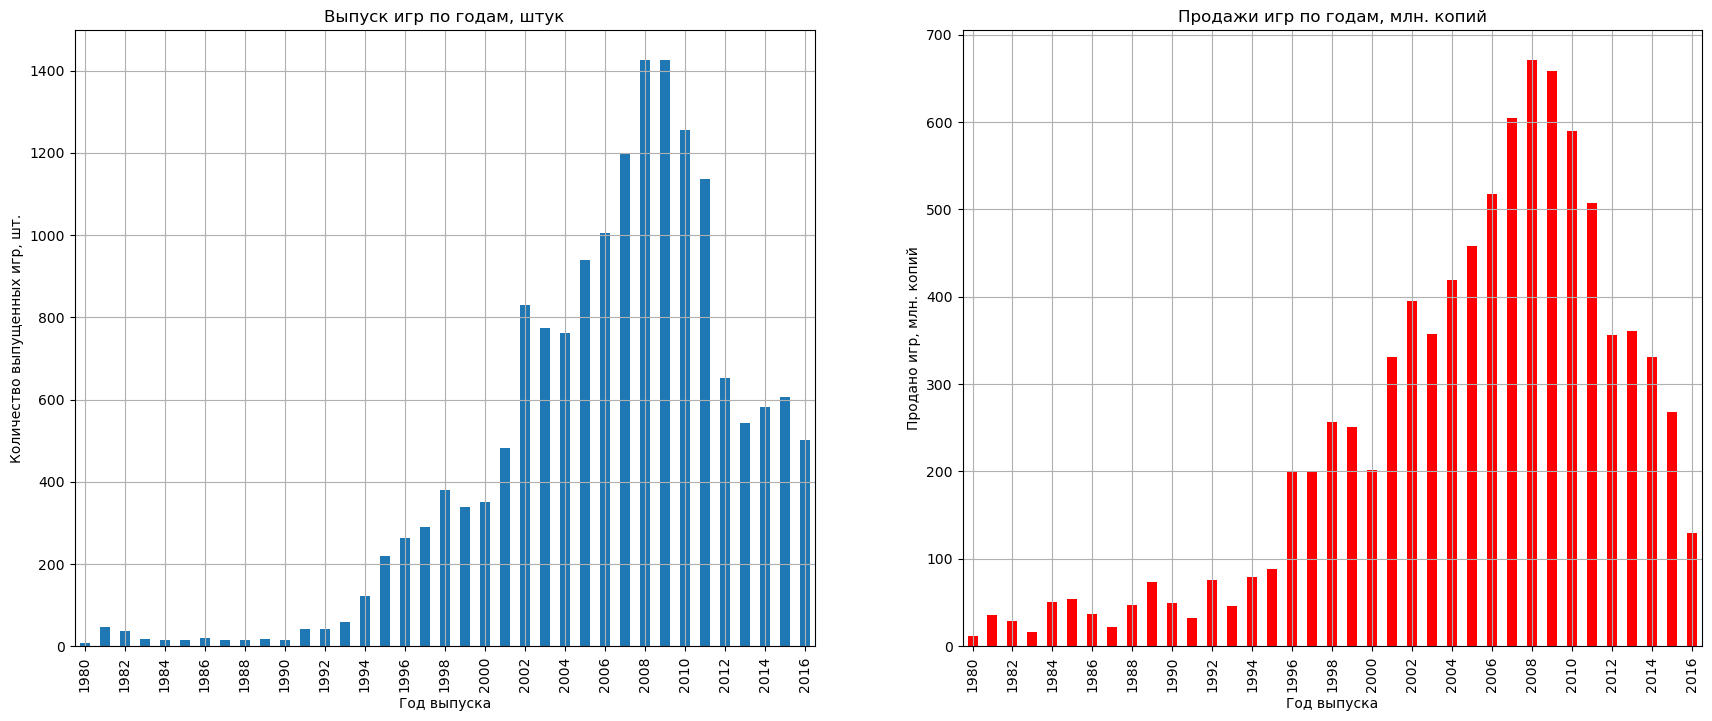

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(21, 8))

ax1 = game_by_year.plot(kind = 'bar', x='year_of_release', y='count_of_games', grid = True, 
                     xlabel='Год выпуска', ylabel='Количество выпущенных игр, шт.', ax=ax1,
                     title='Выпуск игр по годам, штук', legend=None
                    )
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2 = game_by_year.plot(kind = 'bar', x='year_of_release', y='sum_of_sales', grid = True,
                     xlabel='Год выпуска', ylabel='Продано игр, млн. копий', color = 'red', ax=ax2,
                     title='Продажи игр по годам, млн. копий', legend=None
                    )
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.show()

**Вывод:**
- вплоть до середины 90х годов продажа игр (как по числу вариантов, так и по количеству проданных копий для всех платформ) была крайне незначительной (на фоне продаж 2000х)
- со второй половины 90х начинается явный рост (появление новых платформ, технологии 3d, рост производительности электроники)
- рост продолжался (с небольшим "проседанием" в 2004-05 годах) до 2008 года
- в конце 00-х рост сменился спадом (вероятно, обусловлено как мировым экономическим кризисом 2007-08, так и общим "застоем" в игровой индустрии)
- к 2016 году (последний год, за который собраны данные) показатели (как по ассортименту, так и по числу проданных копий) находятся на уровне первых лет 00-х.

Можно уверенно утверждать, что данные до 1994 года существенного влияния на результаты исследовательского/статистического анализов не окажут, поэтому отфильтруем датафрейм, оставив для анализа только данные после 1993

In [39]:
data = data.query('year_of_release > 1993').reset_index(drop= True)

### Выпуск и продажа игр по платформам

In [40]:
# выделим платформы и сгруппируем по мере убывания объёма продаж в исследуемый на этом этапе период
platform_by_year = data.groupby('platform')['all_sales'].agg(['count', 'sum']
                                    ).sort_values(by='sum', ascending = False).reset_index()

*Построим на основе сделанной группировки графики по выпущенным играм и объемам продаж для различных платформ*

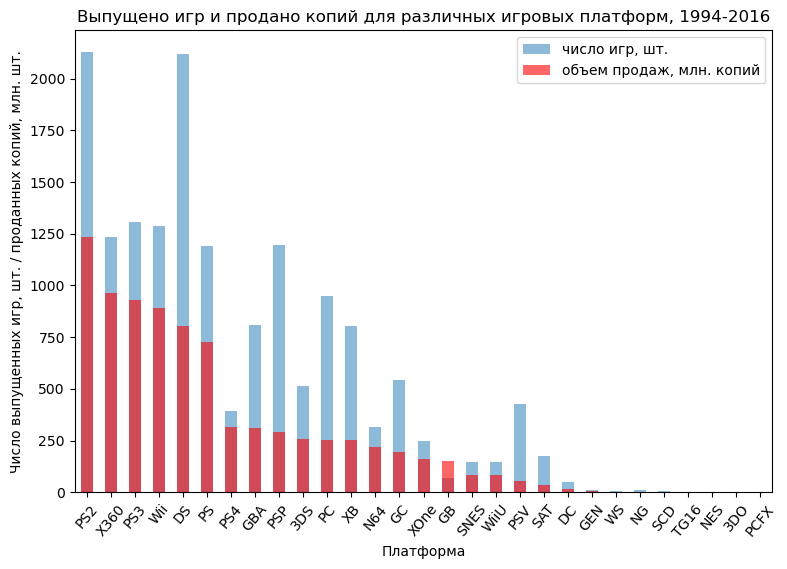

In [41]:
ax = platform_by_year.plot(kind='bar', x='platform', y='count', linewidth=5, alpha=0.5, label='число игр, шт.', 
                  legend=True, title='Выпущено игр и продано копий для различных игровых платформ, 1994-2016', 
                  ylabel='Число выпущенных игр, шт. / проданных копий, млн. шт.')
platform_by_year.plot(kind='bar', x='platform', y='sum', linewidth=5, alpha=0.6, label='объем продаж, млн. копий', rot=50,
                   ax=ax, color ='red', legend=True, xlabel='Платформа', figsize=(9,6))
plt.show()

**Выводы:** 
- по объёмам продаж копий чётко выделяется Топ-6 платформ (3 из которых принадлежат - Sony, 2 - Nintendo  и 1 - Microsoft)
- лидеры по количеству выпущенных игр - платформы DS (Nintendo) и PS2 (Sony)
- близко к "большой шестёрке" по числу выпущенных игр - PSP (Sony), но у этой платформы в разы меньший объём продаж

### Доля производителей в продажах игр

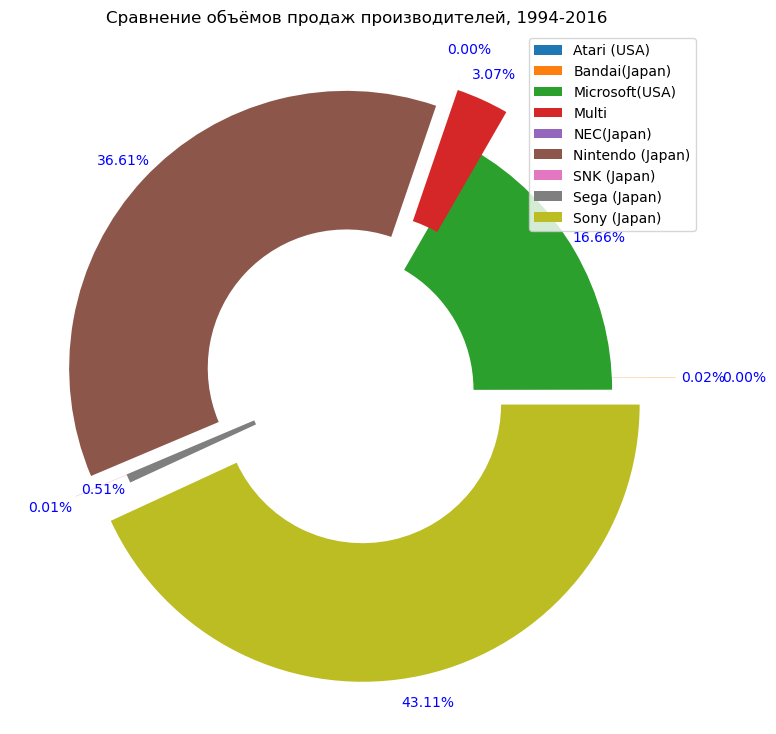

In [42]:
#  построим график "бублик со взрывом" для наглядной демонстрации долей производителей
myexplode = [0.3, 0.15, -0.09, 0.1, 0.15, 0.05, 0.1, -0.1, 0.1] #  формируем размеры смещения долей
data.groupby('manufacturer')['all_sales'].agg('sum'). \
plot(kind='pie', y='sum', figsize=(9,9), autopct='%1.2f%%', pctdistance=1.1, textprops=dict(color="b"),
     title = 'Сравнение объёмов продаж производителей, 1994-2016', ylabel='', wedgeprops=dict(width=0.5),
    legend = data['manufacturer'].unique, labels=None, explode=myexplode);

В исследуемый период рынок игр (по объёмам продаж) поделён (>96%) между тремя основными производителями: Sony (>43% рынка), Nintendo (>36%) и Microsoft (>16%)

### Топ-6 платформ по объёмам продаж

In [43]:
top_platform = platform_by_year['platform'].head(6)
top_platform

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

In [44]:
# формируем сводную таблицу по ТОП-6 платформам (по объёмам продаж)
top6 = data.query('platform in @top_platform').pivot_table(index='year_of_release', values='all_sales', 
                                                           columns = 'platform', aggfunc='sum')

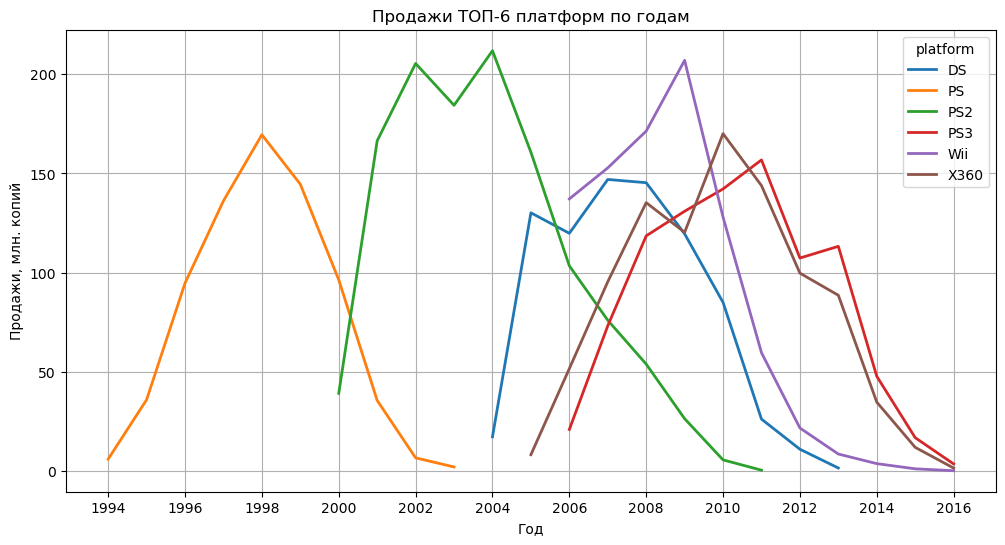

In [45]:
# выведем на одном графике продажи по платформам (млн копий в год)
ax=top6.plot(grid=True, figsize=(12,6), ylabel='Продажи, млн. копий', xlabel='Год', 
          title='Продажи ТОП-6 платформ по годам', linewidth=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.show()

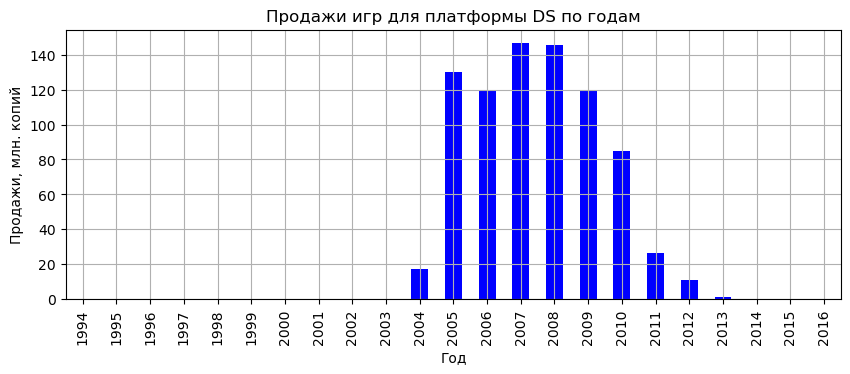

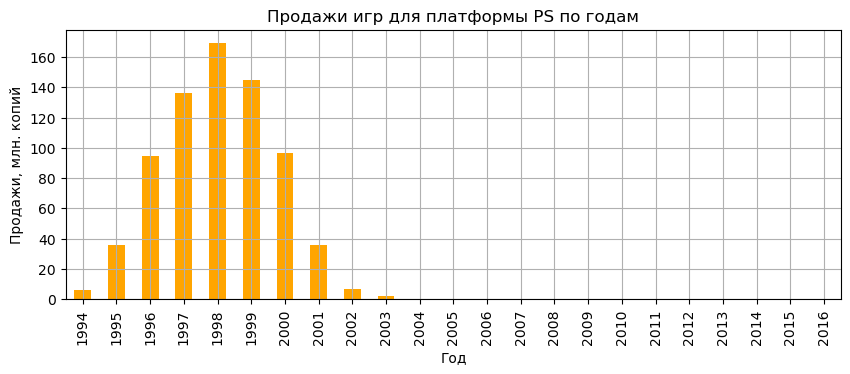

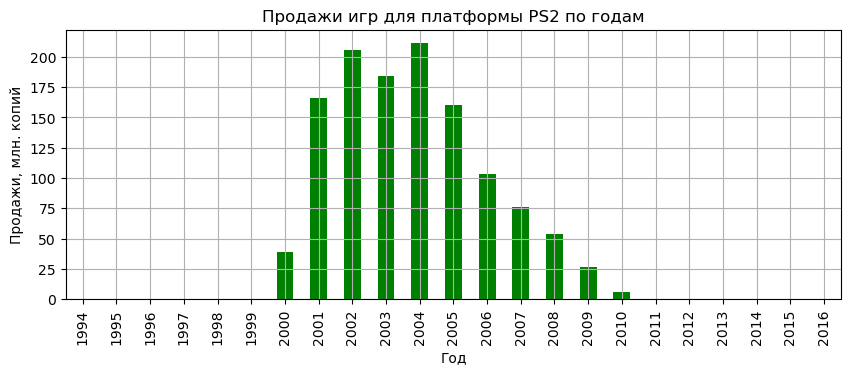

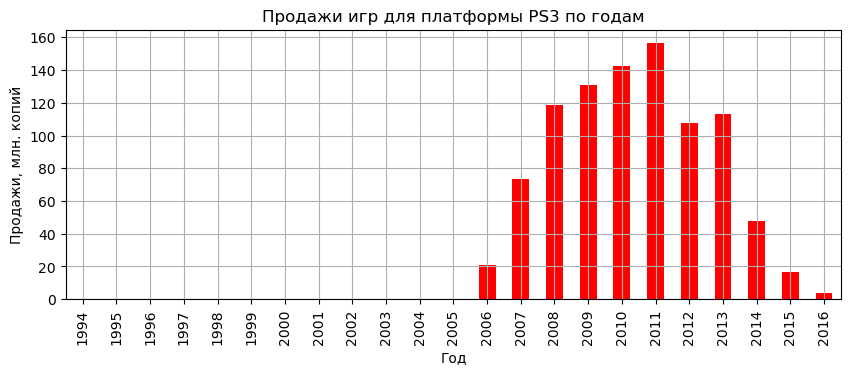

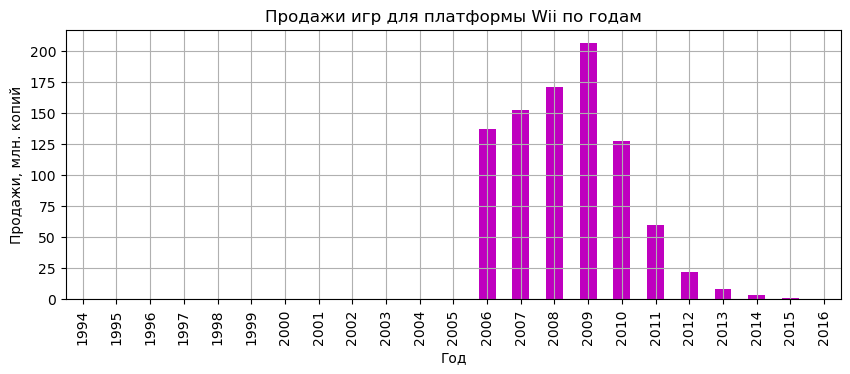

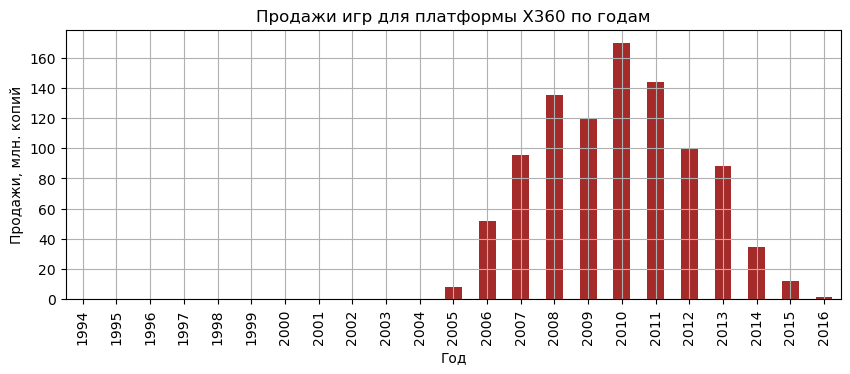

In [46]:
#  в цикле выведем продажи для каждой из платформ на отдельный график
n=['b','orange','g','r','m','brown'] # формируем массив с цветовой схемой (индивидуальный цвет для каждой платформы)
i=-1 # счётчик для задания цвета внутри цикла
for name in top6.columns: 
    i += 1
    top6.plot(y=name, grid=True, kind='bar', figsize=(10,3.5), color=n[i], ylabel='Продажи, млн. копий', xlabel='Год',
             title=f'Продажи игр для платформы {name} по годам', legend=None);   

**Вывод:** \
На графиках видим характерный для всех топ платформ "жизненный цикл":
- 1-2 летний рост продаж игр (плавный или "взрывной", это может быть обусловлено массой параметров, таких, как цена самой платформы, доступность (по количеству и цене) значительного числа игр, наличие конкурирующих платформ в "активной стадии" и т.д.)
- 4-6 летний срок "активной стадии", с основными продажами
- 2-4 летний период "схода" платформы и вывода игр для неё с рынка \
На продолжительность второй и третьей фазы также влияет активность конкурирующих платформ \
"Образцом", наглядно демонстрирующим все фазы, с распределением продаж, близким к нормальному, является платформа PS (Sony). \
А бесспорный лидер по объёму продаж, PS2 (Sony) находился на топовых уровнях продаж (от 150 млн. копий в год) в течение 5 лет. \
Две прямо конкурирующие платформы, PS3(Sony) и X360 (Microsoft) в период своего расцвета (206-2014) показывают схожие результаты по годам, "пропуская" в первой половине этого периода на 1 место по продажам конкурента Wii (Nintendo), что может быть обусловлено разным ценовым позиционированием консолей и игр для них.

### Определение актуального для прогноза периода существования платформы

In [47]:
time_of_platf = []
for name in top6.columns:
    time_of_platf.append(top6.loc[top6[name].notna(), name].count())
print('Среднее время существования платформы (от старта до завершения продаж, ТОП-6):', mean(time_of_platf), 'лет')

Среднее время существования платформы (от старта до завершения продаж, ТОП-6): 11 лет


**Вывод:** \
Средний срок существования топ-платформ - 11 лет, что обусловлено большим числом выпускаемых игр, вложениями в маркетинг, а ограничивается сменой циклов развития электроники, выходом конкурирующих предложений. \
При этом анализ жизненного цикла показывает, что последние 3-4 года у каждой из платформ - явно выраженный спад, поэтому для анализа на перспективу необходимо определить актуальный период рассмотрения (с учётом всех платформ, а не только из ТОП-6, так как на рассматриваемый момент (2016) все они уже либо полностью ушли с рынка, либо находятся в конце своего жизненного цикла) \
Определив средний цикл жизни для всех платформ, мы сможем более качественно выделить актуальный период для рассмотрения потенциально выгодных платформ на 2017 год

In [48]:
platform_by_year = data.groupby(['platform', 'year_of_release']).agg({'all_sales':'sum'}).reset_index()
mean_time = platform_by_year.groupby('platform').agg({'year_of_release': 'nunique'})
print('Среднее время существования платформы:', round(mean_time['year_of_release'].mean(), 1), 'лет')

Среднее время существования платформы: 6.8 лет


**Вывод:** \
Определим период, актуальный для прогноза на ближайшую перспективу в 4 года (3 полных года наблюдений + 1 год (2016) по которому, согласо заданию, данные неполны, т.е. в нашем случае - изучать будем данные за годы с 2013 по 2016 включительно) \
*Чтобы "отсечь" платформы, находившиеся в начале этого периода уже на этапе спада и завершения жизненного цикла, предварительно сформируем список из действовавших на 2016 год платформ. \
Затем, проанализировав данные 2013-2016, постараемся найти перспективные платформы среди "новичков" и/или "менее топовых" платформ, находящихся на этапе роста и/или активном*

In [49]:
#  формируем список актуальных (продававших игры в 2016 году) платформ
actual_platform = data.query('year_of_release == 2016')['platform'].unique()
actual_platform  # посмотрим на список актуальных в 2016 году платформ

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [50]:
#  фильтруем исходный датафрейм, на основе принятого ранее актуального периода (2011-2016) и списка актуальных платформ
actual_data = data.query('(year_of_release > 2012) & (platform in @actual_platform)').reset_index(drop=True)
actual_data.describe().T #  посмотрим на основные параметры актуального списка

,count,mean,std,min,25%,50%,75%,max
year_of_release,2158.0,2014.521316,1.077979,2013.00,2014.00,2015.00,2015.00,2016.00
na_sales,2158.0,0.202567,0.555981,0.00,0.00,0.03,0.16,9.66
eu_sales,2158.0,0.181284,0.520312,0.00,0.00,0.03,0.14,9.09
jp_sales,2158.0,0.063712,0.237777,0.00,0.00,0.01,0.05,4.35
other_sales,2158.0,0.055519,0.168258,0.00,0.00,0.01,0.04,3.96
critic_score,990.0,72.021212,12.847655,13.00,66.00,74.00,81.00,97.00
user_score,1189.0,6.587300,1.608191,0.20,5.80,7.00,7.80,9.30
all_sales,2158.0,0.503082,1.253867,0.01,0.04,0.12,0.42,21.05


In [51]:
actual_data.pivot_table(index='year_of_release', values='all_sales', columns = 'platform', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


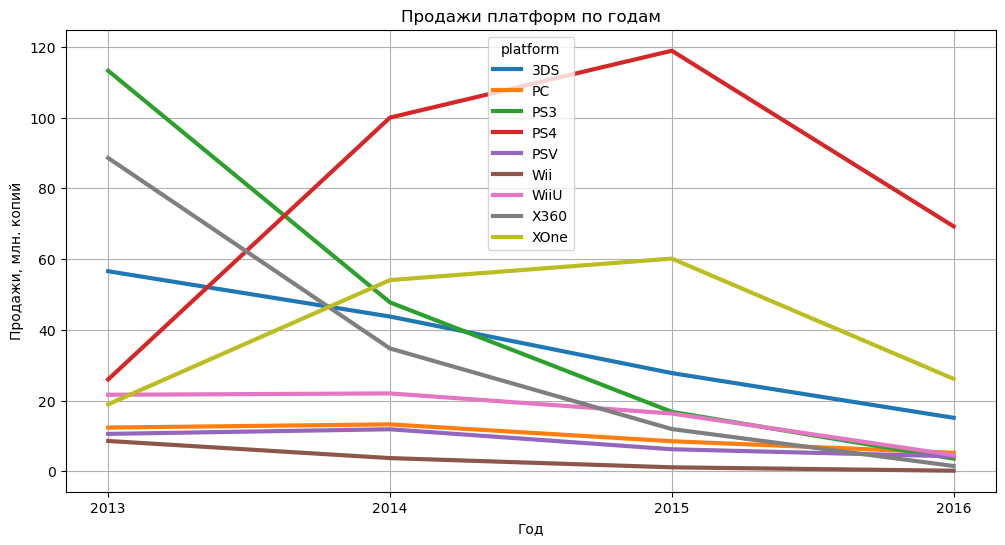

In [52]:
#  # выведем на одном графике продажи по платформам (млн копий в год)
actual_data_graph=actual_data.pivot_table(index='year_of_release', values='all_sales', columns = 'platform', aggfunc='sum')
ax = actual_data_graph.plot(grid=True, figsize=(12,6), ylabel='Продажи, млн. копий', xlabel='Год', 
                            title='Продажи платформ по годам', linewidth=3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

**Выводы:** \
Видны три явных лидера: *PS4 (Sony), XOne(Microsoft), 3DS(Nintendo)*, чьи объёмы продаж (в штуках) на порядок и более превышают объёмы других платформ. При этом **ни одна из платформ не показывает тенденцию к росту или хотя бы сохранению объёмов в перспективе**.
Правда, в описании проекта содержится указание на то, что данные представлены на декабрь 2016 года, и скорее всего, в объём продаж не попали рождественские распродажи конца года, которые обычно составляют заметную долю в общегодовом. Но, даже с учётом этого предположения, падение год/год (2015/2016) для всех платформ составит от 1,5 раз и более. \
При разработке планов продвижения на 2017 год, стоит остановить свой выбор на трёх ранее указанных платформах - лидерах, а также уделить внимание, хотя и проседающему, но пока сохраняющемуся в фокусе внимания пользователей сегменте игр для PC.

### Продажи игр в актуальном периоде (2013-2016)

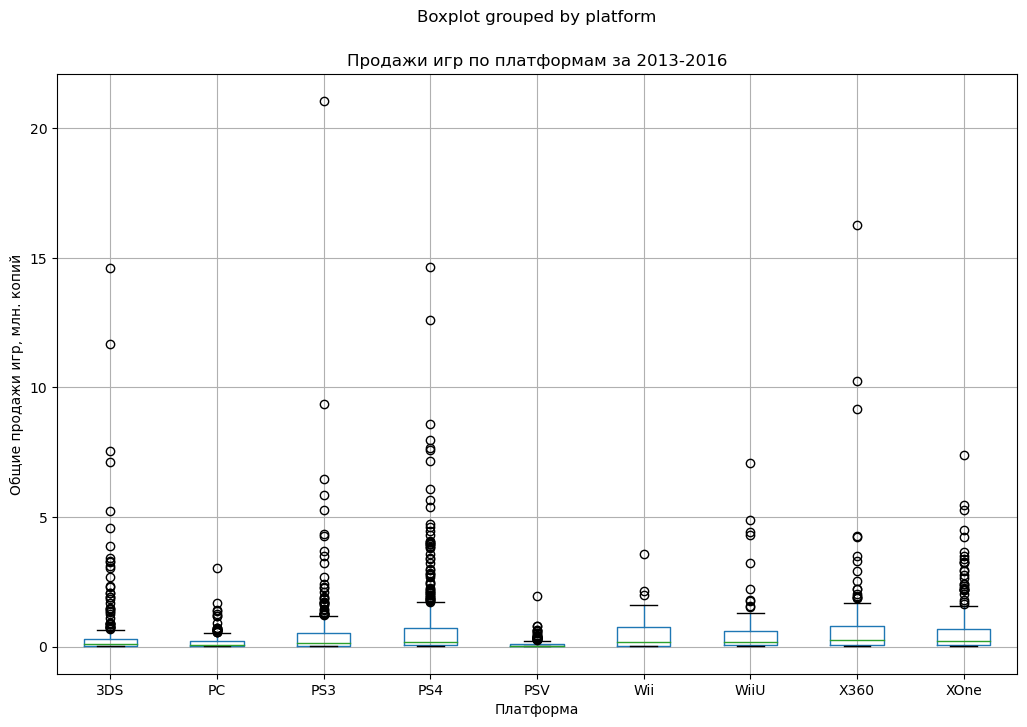

In [53]:
actual_data.boxplot(column='all_sales', by='platform', figsize=(12,8)). \
 set(xlabel='Платформа', ylabel='Общие продажи игр, млн. копий', title="Продажи игр по платформам за 2013-2016");

Изучим подробнее медиану и 75% квантиль, для чего *дополнительно построим boxplot, ограничив интервал отображения*

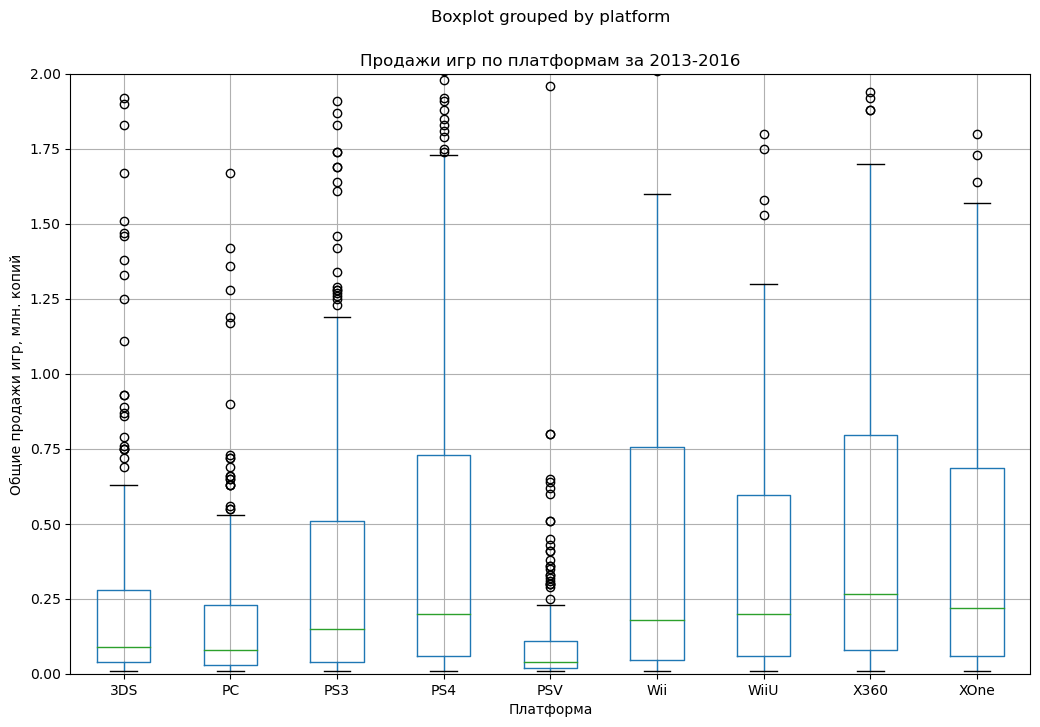

In [54]:
actual_data.boxplot(column='all_sales', by='platform', figsize=(12,8)). \
set(xlabel='Платформа', ylabel='Общие продажи игр, млн. копий', title="Продажи игр по платформам за 2013-2016", ylim=(0,2));

Наблюдаем характерное явление (для всех платформ) - медиана смещена к нулю, при этом у большинства платформ "длинные хвосты" в четвёртом квартиле, а также несколько десятков выбросов вверх, похоже, что для всех  производителей характерны продажи единиц/десятков "топовых игр" и нескольких десятков "середнячков", в сумме дающих основной объём продаж + массовый выпуск игр (с невысокими продажами, но составляющими составляющих "экосистему" платформы), что позволяет предлагать покупателю максимальный ассортимент. Чем больше у платформы "топовых игр", тем позитивнее прогноз суммарных продаж. 

Выше всего медиана у платформ Microsoft, далее следуют платформы Sony и Nintendo. Отмеченная ранее как перспективная, 3DS, при сравнительно низкой медиане (большое число "непродающихся" игр) обладает заметным числом выбросов вверх, то есть политика компании для этой платформы - "выпускаем максимальное число игр, некоторые (достаточно много) "выстрелят" 

Перспективных новых платформ среди исследуемых в актуальном периоде не обнаруживается, все из представленных находятся в процессе спада, более или менее далеко от топовых значений активного периода "жизненного цикла"

**Вывод:** \
Рекомендуем в 2017 году сосредоточиться на продажах игр платформ PS4 (Sony), XOne(Microsoft), 3DS(Nintendo)\
Сконцентрируем ассортимент и марк. усилия на продажах "топ" и "середнячковых" игр (при условии, что производители платформ не обсуславливают дистрибьюцию "продаваемых" игр требованием к обязательной продаже "остальных")

### Влияние на продажи отзывов пользователей и критиков (для всех платформ)

*Изучим, как влияют на продажи внутри популярной платформы отзывы пользователей и критиков, а также сравним эти результаты с данными для нескольких других платформ.*
Для анализа возьмём выбранные нами платформы с максимальными продажами игр: **PS4, 3DS, XOne** и, для дополнительного сравнения, ещё две платформы, выберем которые, изучив объёмы выпуска игр и продаж в актуальный период для всех, существовавших в 2016 году, платформ

In [55]:
platform_by_year_2013_2016 = actual_data.groupby('platform')['all_sales'].agg(['count', 'sum']
                                    ).sort_values(by='sum', ascending = False).reset_index()

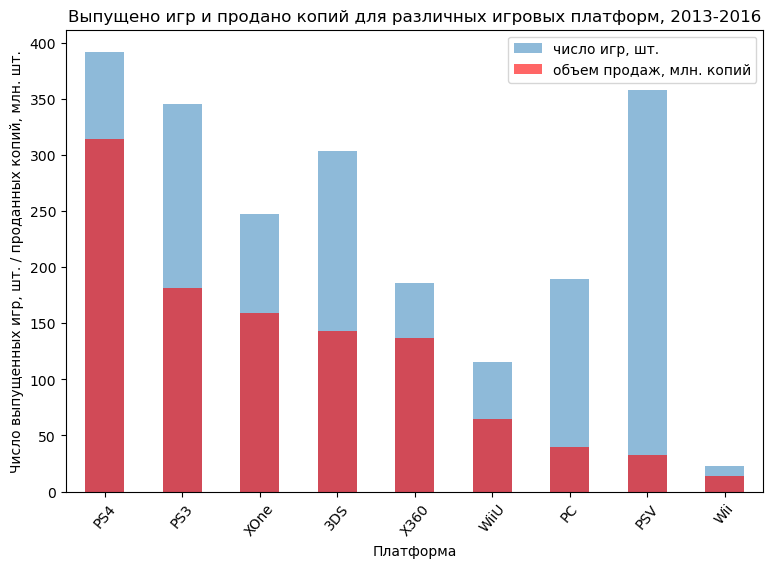

In [56]:
ax = platform_by_year_2013_2016.plot(kind='bar', x='platform', y='count', linewidth=5, alpha=0.5, label='число игр, шт.', 
                  legend=True, title='Выпущено игр и продано копий для различных игровых платформ, 2013-2016', 
                  ylabel='Число выпущенных игр, шт. / проданных копий, млн. шт.')
platform_by_year_2013_2016.plot(kind='bar', x='platform', y='sum', linewidth=5, alpha=0.6, label='объем продаж, млн. копий',
                                rot=50, ax=ax, color ='red', legend=True, xlabel='Платформа', figsize=(9,6))
plt.show()

Добавим к сравнению ещё пару платформ - одну с высокими продажами, но не попавшую ранее в рекомендации на 2017 (т.к. уже находится на этапе завершения "жизненного цикла") **PS3** и одну - с небольшими продажами, но при этом - с большим числом выпущенных игр, **PSV**

In [57]:
leader_platform = ['PS4','3DS','XOne','PS3', 'PSV']

In [58]:
all_sell_score = actual_data[['platform','all_sales','critic_score','user_score']]. \
query('platform in @leader_platform').reset_index(drop=True)
for name in all_sell_score['platform'].unique():
    print(f'Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для платформы {name}', '\n')
    print(all_sell_score.query('platform == @name').reset_index(drop=True).corr(), '\n')

Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для платформы PS3 

              all_sales  critic_score  user_score
all_sales      1.000000      0.334285    0.002394
critic_score   0.334285      1.000000    0.599920
user_score     0.002394      0.599920    1.000000 

Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для платформы PS4 

              all_sales  critic_score  user_score
all_sales      1.000000      0.406568   -0.031957
critic_score   0.406568      1.000000    0.557654
user_score    -0.031957      0.557654    1.000000 

Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для платформы 3DS 

              all_sales  critic_score  user_score
all_sales      1.000000      0.357057    0.241504
critic_score   0.357057      1.000000    0.769536
user_score     0.241504      0.769536    1.000000 

Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для платформы XOne 

              all_sales  

**Вывод:** 
- практически для всех изученных платформ корреляции между общим объёмом продаж и отзывами пользователей не отмечается
- есть слабая корреляция между отзывами пользователей на продукцию 3DS (Nintendo) и объёмами продаж
- в целом существует прямая корреляция между объёмом продаж и отзывами критиков (вероятно, некоторая часть покупателей перед приобретением интересуется отзывами профессиональных оценщиков - критиков, у лидеров продлаж этот коэфф. находится на уровне 0.35-0.4, что не позволяет говорить о прямой зависимости, но как минимум, нельзя полностью исключить влияние этого фактора
- более заметна корреляция друг с другом между уровнями величины отзывов критиков и пользователей, что можно объяснить "взаимовлиянием" - критики - тоже пользователи, их оценка привлекает к покупке игры достаточное количество пользователей, оставляющих близкую оценку

### Влияние на продажи отзывов пользователей и критиков (для каждой из платформ)

In [59]:
# создадим dictionary - цветовую схему, "свой" цвет для каждой платформы
col_sch = {'PS4': 'red', '3DS':'blue', 'XOne':'olive', 'PS3': 'green', 'PSV': 'violet'}

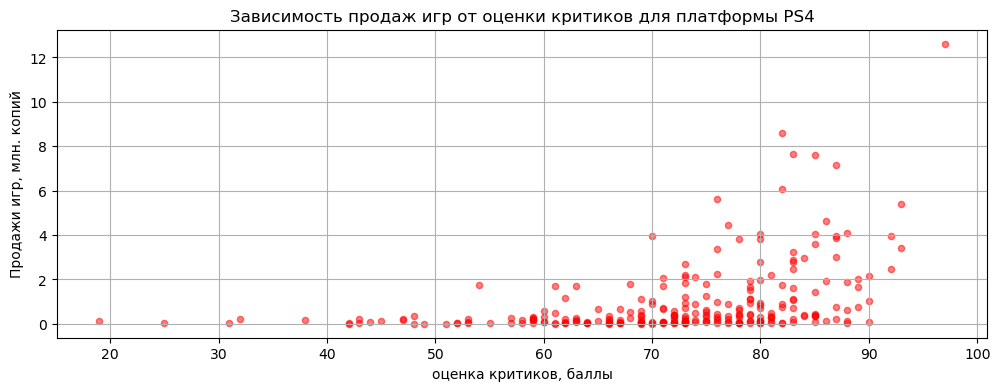

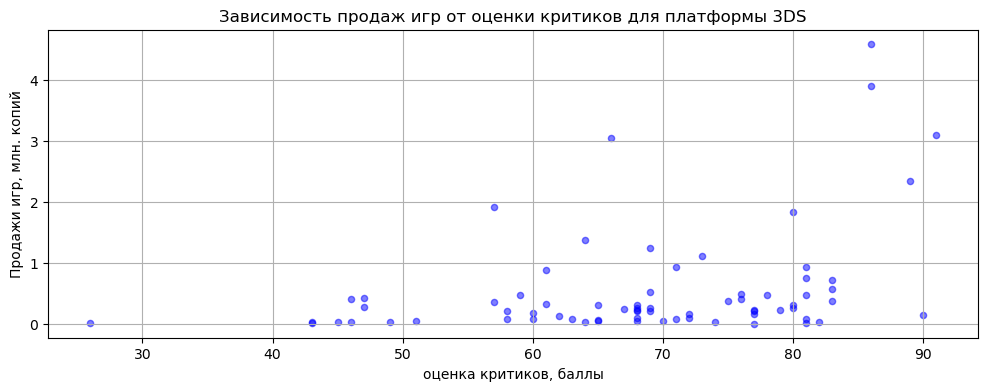

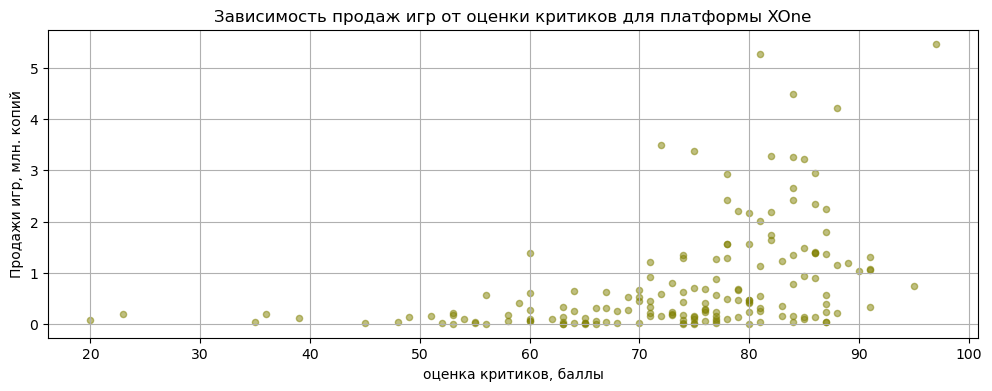

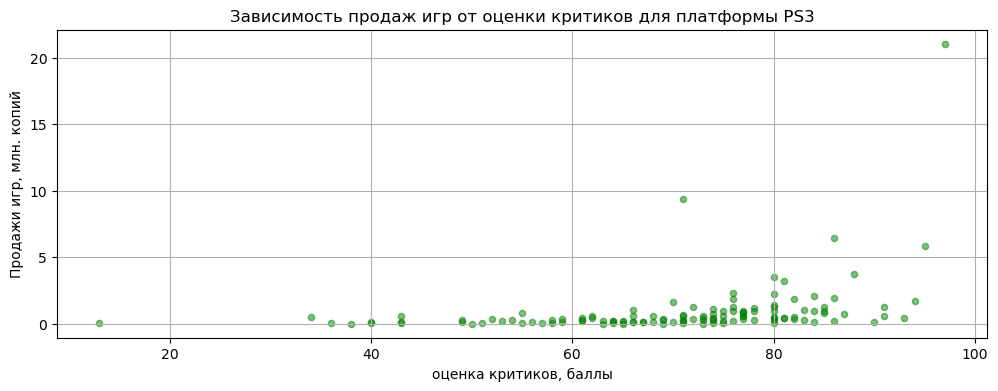

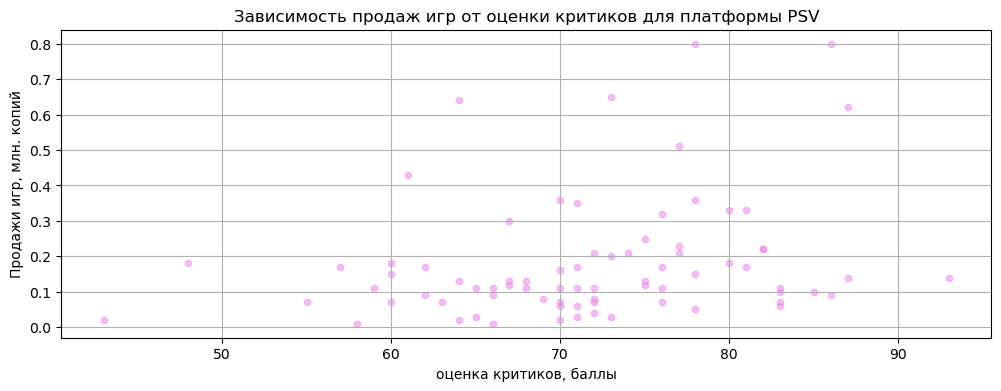

In [60]:
#  в цикле для каждой из актуальных платформ построим диаграммы рассеяния, показывающие связь между продажами игр
#  для платформы и средней оценкой критиков для этой игры
for name in leader_platform:
    all_sell_score.query('platform == @name').plot(kind='scatter', x='critic_score', y='all_sales', grid=True, alpha=0.5,
                                                   color=col_sch[name], figsize=(12,4)). \
                set(title=f'Зависимость продаж игр от оценки критиков для платформы {name}', 
                    xlabel='оценка критиков, баллы', ylabel='Продажи игр, млн. копий')
    plt.show();

**Выводы:**
 - при низких и средних оценках критиков, говорить об их влиянии на продажи игр не приходится
 - начиная с уровня оценки "выше среднего" (70 баллов из 100) можно говорить о наличии связи между продажами и оценками критиков (особенно характерно это для PS4), при этом стоить помнить, что явной корреляции (а тем более зависимости продаж от оценок) мы не обнаруживаем
 - критики не очень суровы при выдаче низких оценок, единичные игры на популярных платформах имеют рейтинг ниже 30 \
 - в оценке игр для платформы PSV критики весьма лояльны (в выбранном датасете практически нет совсем низких оценок), при этом на объеме продаж это никак не сказывается  \
**NB** При выборе платформ для продвижения их игр в 2017 году можно ориентироваться в том числе на рейтинг критиков (только для высоких, от 70 баллов, оценок)

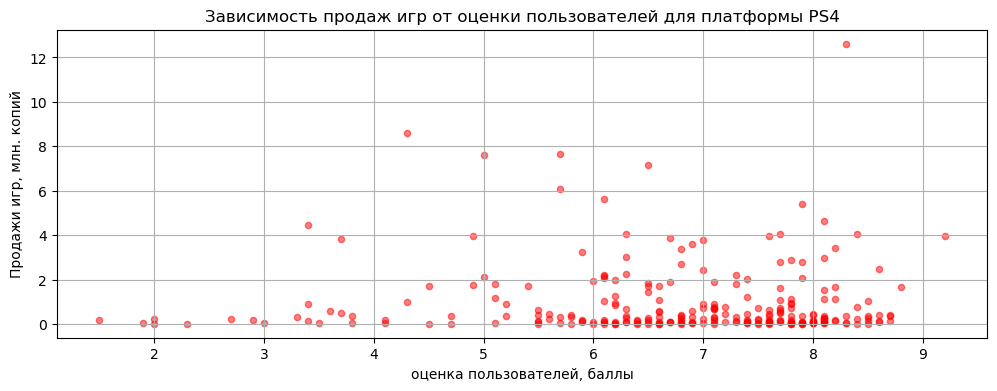

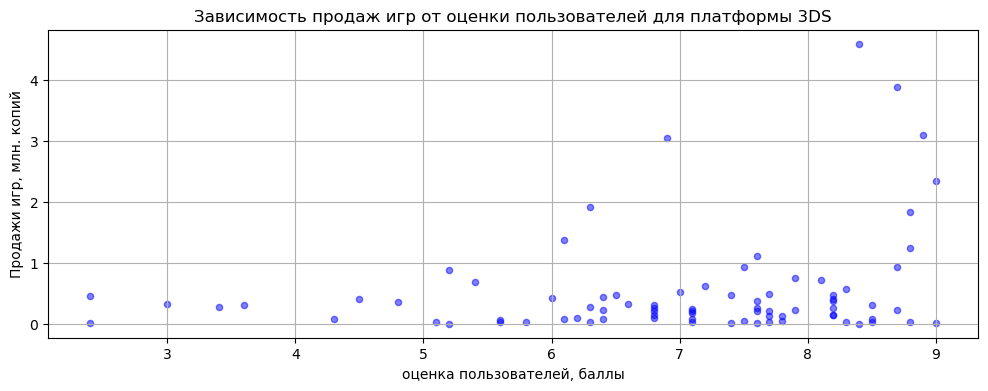

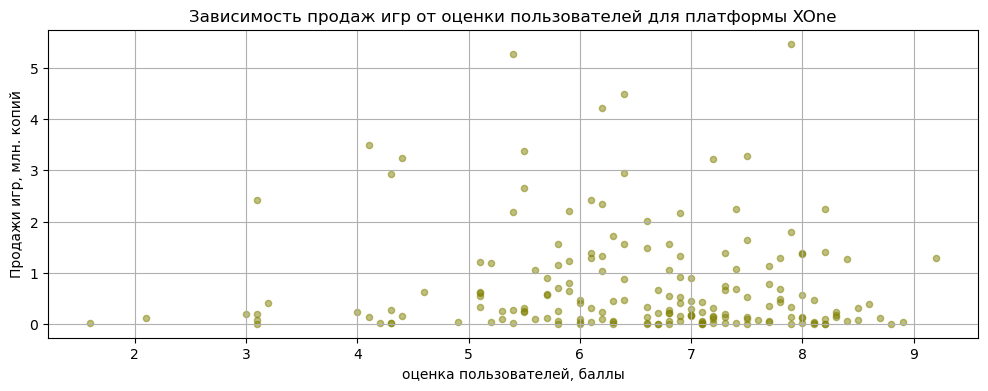

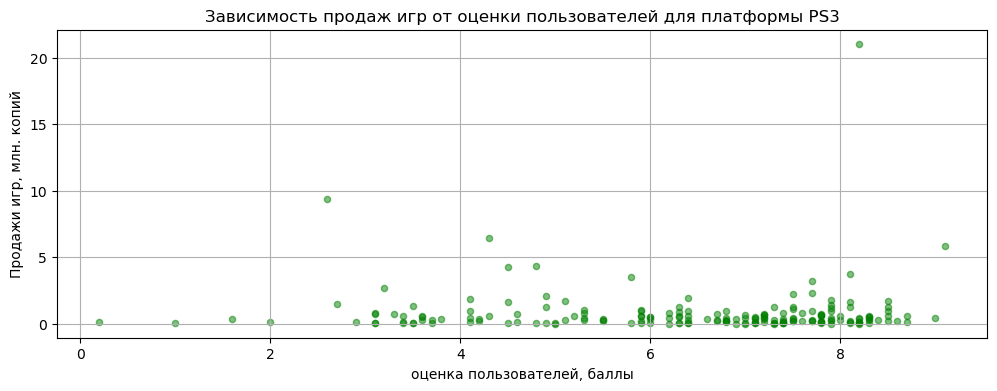

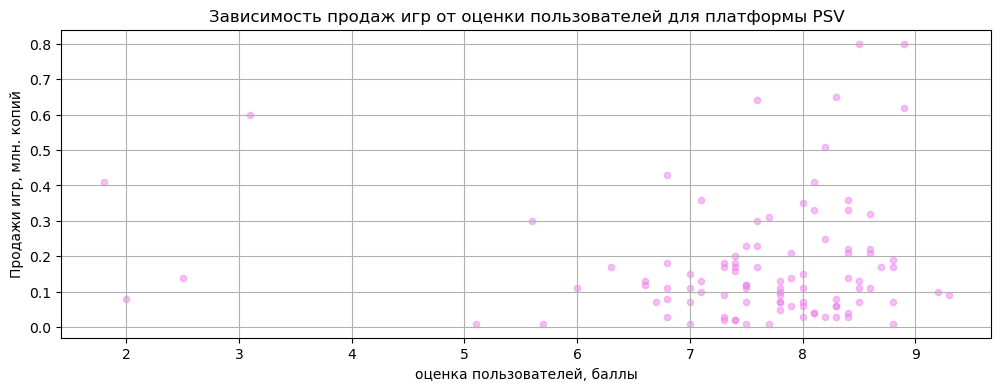

In [61]:
#  в цикле для каждой из актуальных платформ построим диаграммы рассеяния, показывающие связь между продажами игр
#  для платформы и средней оценкой пользователей для этой игры
for name in leader_platform:
    all_sell_score.query('platform == @name').plot(kind='scatter', x='user_score', y='all_sales', grid=True, alpha=0.5, 
                                                   color=col_sch[name], figsize=(12,4)). \
                set(title=f'Зависимость продаж игр от оценки пользователей для платформы {name}', 
                    xlabel='оценка пользователей, баллы', ylabel='Продажи игр, млн. копий')
    plt.show();

**Выводы:**
 - практически невозможно отследить взаимосвязь между объёмом продаж игр и оценкой пользователей: это хорошо видно на примере  PSV, PS4 и XOne, где многие лидеры продаж имеют сравнит. невысокую оценку со стороны пользователей
 - для 3DS характерно распределение "как у критиков" - лидерующие по продажам игры оцениваются пользователями от 7 из 10 и выше  \
**NB** При выборе игр на продвижение в 2017 году нет большого смысла ориентироваться на оценки со стороны пользоваталей: высокие оценки далеко не всегда дают гарантию "покупаемости" игры

*Ограничения, которые необходимо учитывать при анализе выводов в предыдущем пункте исследования*: \
мы (в связи с обнаруженными особенностями "жизненного цикла" платформ) сократили исследуемый набор данных 4 годами, что сократило исследуемый массив с ~ 16 тыс. до 2 с небольшим тыс. строк. При этом объём оценок критиков и пользователей ещё меньше (заполнено ~ 1/2 от количества строк)

### Выпуск и продажа игр по жанрам

Ориентируемся при изучении на "актуальный период" (2013-2016)

In [62]:
# для каждого жанра найдём суммарное и медианное число проданных копий, а также число выпущенных игр
genre_table = actual_data.pivot_table(index='genre', values='all_sales', aggfunc=['sum', 'mean', 'median','count'])
genre_table.columns = ['sum', 'mean', 'median', 'count']
genre_table.reset_index(inplace=True)

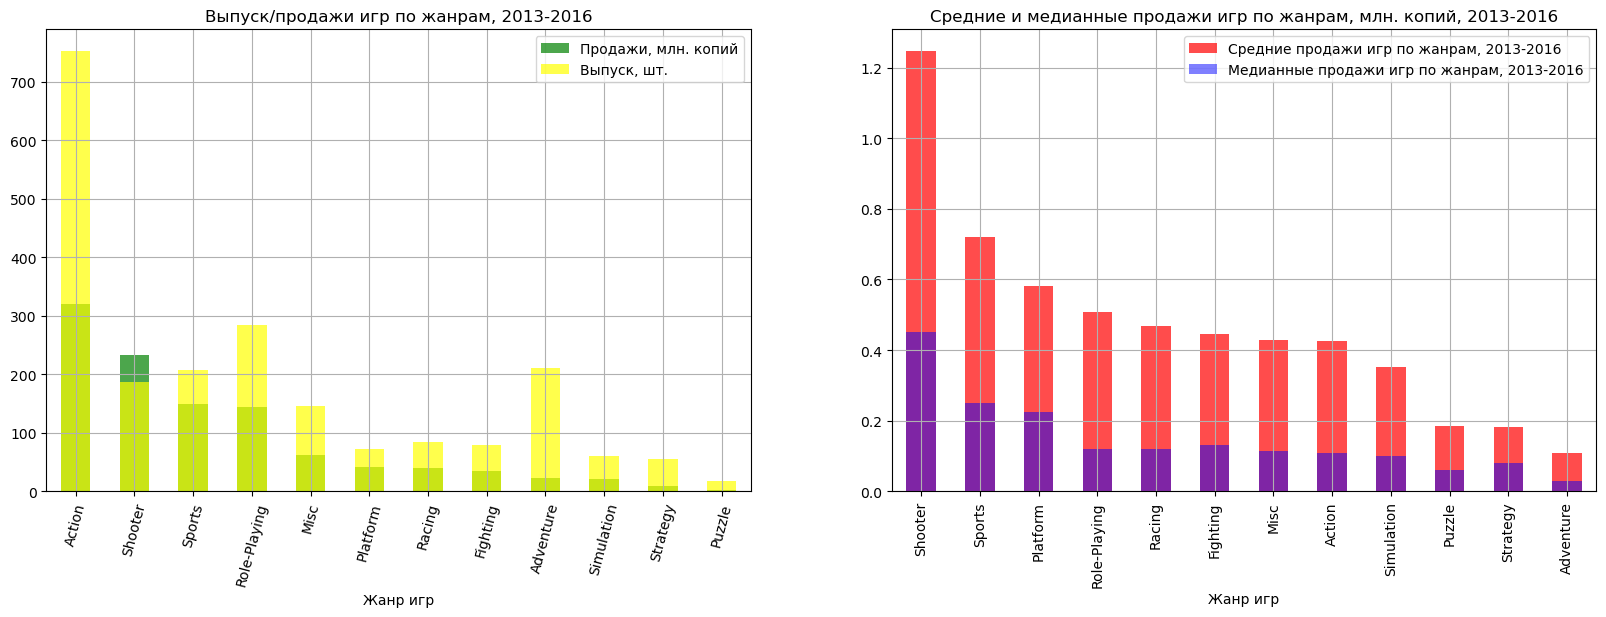

In [63]:
# для удобства оценки выведем объёмы выпуска и продаж на одном графике, а медианы и средние по продажам - рядом
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
#  график продаж и выпуска игр по жанрам за 2013-2016
genre_sum = genre_table.sort_values(by='sum', ascending=False)
ax=genre_sum.plot(kind='bar', x='genre', y='sum', grid=True, alpha=0.7, color='green', ax=ax, label="Продажи, млн. копий")

genre_sum.plot(kind='bar', x='genre', y='count', rot=75, ax=ax, grid=True, xlabel='Жанр игр',
               title='Выпуск/продажи игр по жанрам, 2013-2016', alpha=0.7, color = 'yellow', label='Выпуск, шт.')

#  график медианы и среднего продаж игр по жанрам 2013-2016
genre_mean = genre_table.sort_values(by='mean', ascending=False)
ax1=genre_mean.plot(kind='bar', x='genre', y='mean', grid=True, color='r', ax=ax1, alpha=0.7, xlabel='Жанр игр', 
                   label='Средние продажи игр по жанрам, 2013-2016')
genre_mean.plot(kind='bar', x='genre', y='median', grid=True, color='b', ax=ax1, alpha=0.5, xlabel='Жанр игр', 
                title='Средние и медианные продажи игр по жанрам, млн. копий, 2013-2016', 
                label='Медианные продажи игр по жанрам, 2013-2016');

- лидерство в общих продажах игр жанра `Action` не совпадает с лидерством в медианных продажах, здесь впереди всех жанров `Shooter`, при этом `Shooter` занимает и место в тройке самых крупных по объёму продаж жанров
- видимо, для ряда жанров (`role-playing`, `misc`) объем продаж осуществляется за счёт массового выпуска малопокупаемых игр и наличия ряда топовых бестселлеров
- практически для всех жанров характерно сильное расхождение медианы и среднего (в пользу последнего), что свидетельствует о большом числе выбросов вверх

*Проверим последнее наблюдение, построив boxplot:*

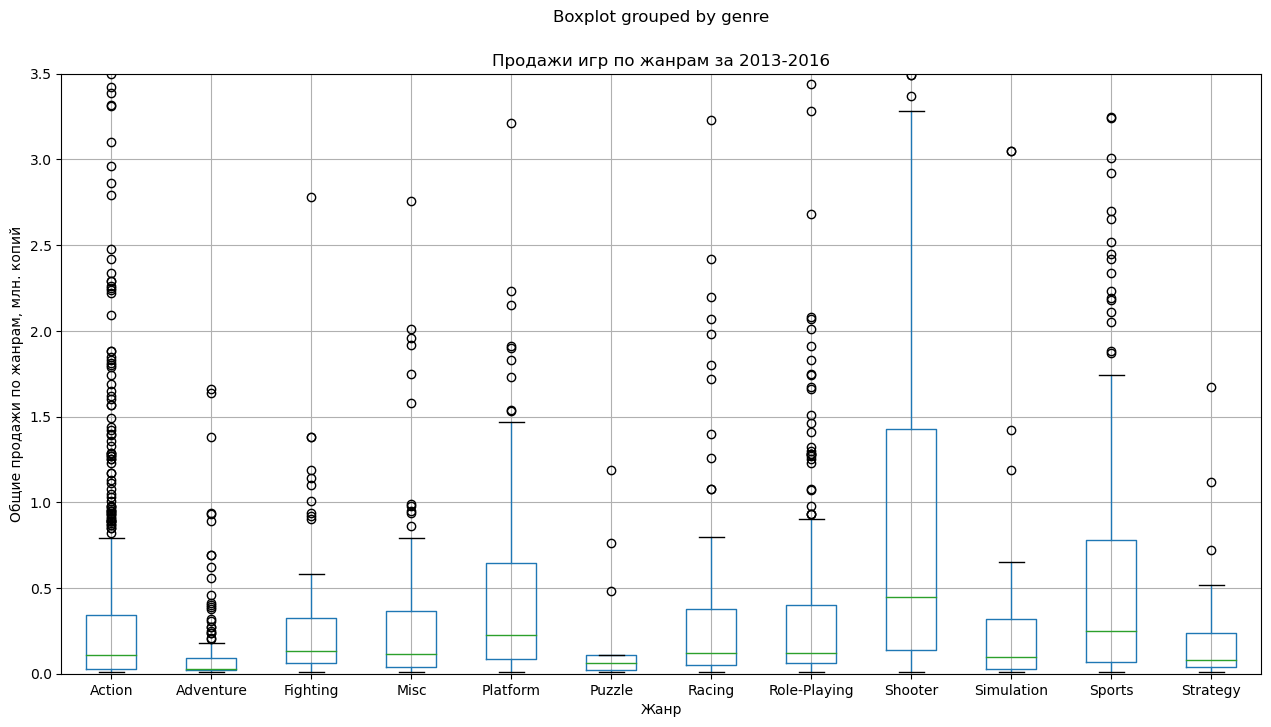

In [64]:
actual_data.boxplot(column='all_sales', by='genre', figsize=(15,8)). \
set(xlabel='Жанр', ylabel='Общие продажи по жанрам, млн. копий', title="Продажи игр по жанрам за 2013-2016", ylim=(0,3.5));

- есть более "надёжные" жанры, где сравнительно значимая часть игр вовлечена в продажи (`Shooter`,`Sports`,`Platform`,`Role-Playing`)
- есть жанры с большим числом выбросов, зависящие в своих продажах от топовых нескольких десятков игр (`Action`, `Fighting`, `Racing`, `Misc`)
- жанры `Simulation`, `Strategy`, `Puzzle` и `Adventure` не обладают ни высокой медианой продаж, ни значительным 4 квартилем, ни заметным числом выбросов - это аутсайдеры нашего списка жанров (применительно к объёмам продаж) 

*Сформируем массив из "неаутсайдеров" и проверим, кореллируют ли продажи в этих жанрах с оценками критиков и пользователей*

In [65]:
leader_genre = ['Shooter','Sports','Platform','Role-Playing', 'Action', 'Fighting', 'Racing', 'Misc']

In [66]:
all_sell__genre_score = actual_data[['genre','all_sales','critic_score','user_score']]. \
query('genre in @leader_genre').reset_index(drop=True)

In [67]:
for name in all_sell__genre_score['genre'].unique():
    print(f'Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для жанра {name}', '\n')
    print(all_sell__genre_score.query('genre == @name').reset_index(drop=True).corr(), '\n')

Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для жанра Action 

              all_sales  critic_score  user_score
all_sales      1.000000      0.378347    0.135479
critic_score   0.378347      1.000000    0.483774
user_score     0.135479      0.483774    1.000000 

Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для жанра Shooter 

              all_sales  critic_score  user_score
all_sales      1.000000      0.325800   -0.201927
critic_score   0.325800      1.000000    0.433908
user_score    -0.201927      0.433908    1.000000 

Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для жанра Role-Playing 

              all_sales  critic_score  user_score
all_sales      1.000000      0.376495    0.052249
critic_score   0.376495      1.000000    0.565714
user_score     0.052249      0.565714    1.000000 

Коэффициент корреляции отзывов (критики и пользователи) и объема продаж для жанра Misc 

              all_sales  

**Вывод:** 
- практически для всех изученных жанров корреляции между общим объёмом продаж и отзывами пользователей не отмечается (для жанра `Shooter` интересна (весьма слабая) отрицательная корреляция
- практически для всех изученных жанров корреляции между общим объёмом продаж и отзывами критиков не отмечается (как правило, она чуть больше, чем с оценками пользователей, но давать рекомендации на основании таких цифр - некорректно)

*Изучим изменения в долях от общих продаж с течением времени*

In [68]:
genre_all_sum = data.pivot_table(index='genre', values='all_sales', aggfunc='sum')
genre_all_sum.reset_index(inplace=True)

In [69]:
explode = (0.05, 0.1, 0.05, 0.05, 0.1, 0.05,0.1,0,0.1,0,0.05,0.1) # для графиков pie сформируем массив с "разлётом" долей

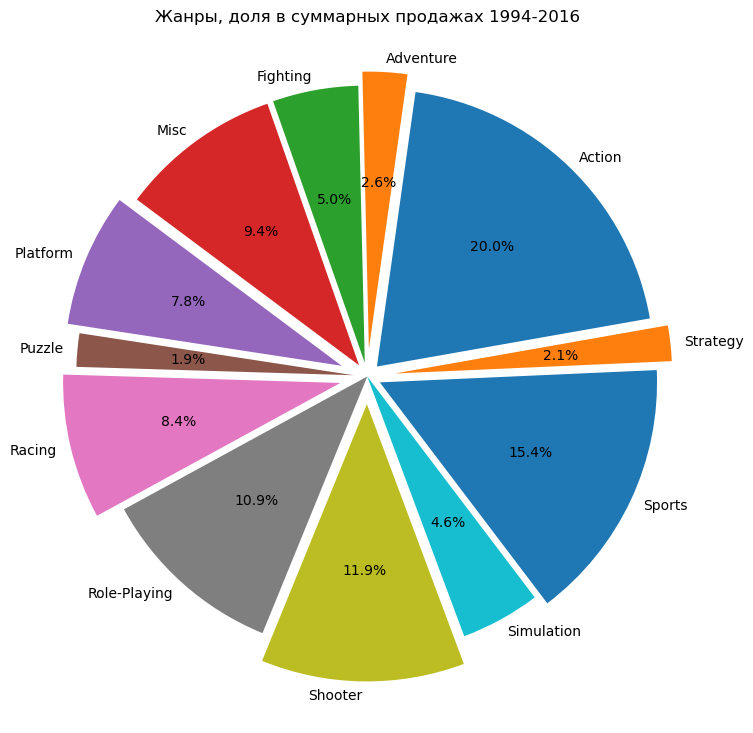

In [70]:
genre_all_sum.plot(kind='pie', y='all_sales', ylabel='', figsize=(9,9), autopct='%1.1f%%', 
                 title = 'Жанры, доля в суммарных продажах 1994-2016', legend=None, explode=explode, startangle=10, 
                 labels=genre_all_sum['genre'], labeldistance=1.05);

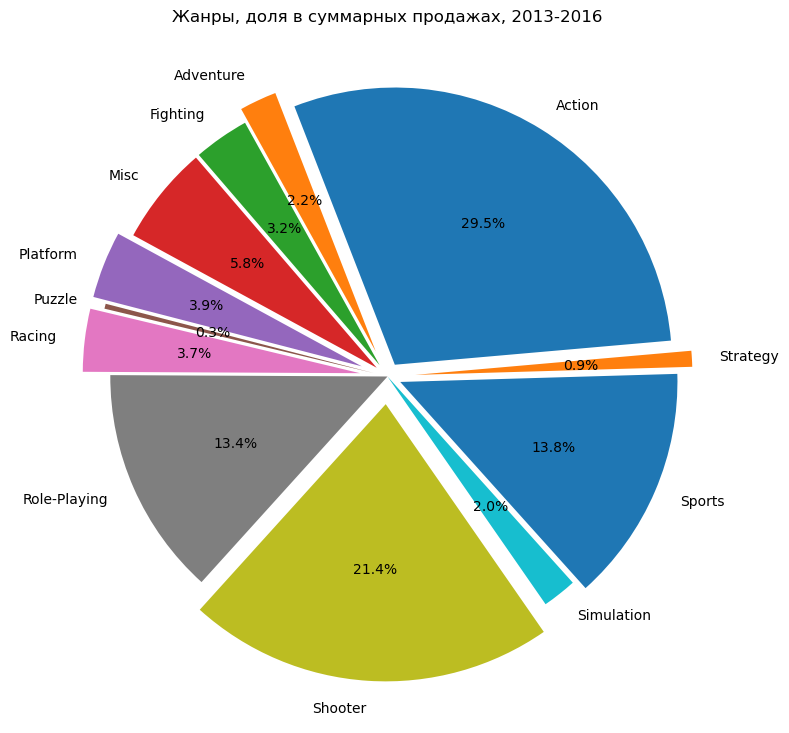

In [71]:
genre_actual_sum = data.query('year_of_release > 2012').pivot_table(index='genre', values='all_sales', aggfunc='sum')
genre_actual_sum.reset_index(inplace=True)
genre_actual_sum.plot(kind='pie', y='all_sales', ylabel='', autopct='%1.1f%%', 
                      title = 'Жанры, доля в суммарных продажах, 2013-2016', legend=None, figsize=(9,9),
                      explode=explode, startangle=5, labels=genre_actual_sum['genre'], labeldistance=1.1);

**Выводы:**
- на протяжении актуального периода основную долю по сумме (3/4 продаваемых игр) занимали 4 жанра: `action`, `shooter`, `role-playing`, `sports`, эта доля значительно подросла в последние годы по сравнению со всем рассматриваемым периодом, с 55% (за счёт "каннибализации" остальных жанров)
- при этом для жанров `shooter` и `sports` на boxplots характерна высокая медианы, большой межквартильный размах (МКР) и 4й квартиль, что свидетельствует об устойчивых продажах игр жанра, зависящих не только от нескольких "хитовых" игр
- жанр `action`находится среди "середняков" по показателям (медиана, МКР), но отличается заметным на фоне остальных числом выбросов, т.е. не весь жанр, но несколько десятков игр из сотен выпускаемых в этом жанре обеспечивают общее лидерство
- устойчивые показатели (сравн. высокую медиану и МКР) наблюдаем и у жанра `platform`
- жанр `role-playing`, хотя и не отличается высокими показателями медианы и МКР, отличается заметным числом выбросов, позволяющим играм в этом данре входит в четвёрку лидеров по общим объёмам продаж


Идеи для маркетингового продвижения в 2017 году по жанрам: 
1) `shooter`,`sports`- отличаются заметными общими продажами и устойчивым распределением, в меньшей степени зависят от "топовых игр",
2) `role-playing`, `action` - в последние годы "выплывают" за счёт нескольких десятков топовых игр, на которых и стоит сконцентировать основные марк. усилия, 
3) `platform` - обладает хорошим ассортиментом, с устойчивыми продажами, в меньшей степени чем остальные середняки, зависящими от "топовых игр"
4) Усилия для продвижения игр жанров `puzzle`,`strategy`,`adventure` прикладывать смысла не имеет

На этом исследовательский анализ данных завершён, общие рекомендации по платформам и жанрам для приложения  усилий на 2017 год будут даны в итоговом выводе по проекту.

## Изучение регионов продаж

### Портрет пользователя (для каждого региона)

Для пользователя из каждого региона (NA, EU, JP, OTHER) определим:
 - самые популярные платформы (топ-5) + "остальные" (other_platform),
 - самые популярные жанры (топ-5) + "остальные" (other_genre), 
 - влияние рейтинга ESRB на продажи в отдельном регионе \
проанализируем сходства и различия в выбираемых платформах и жанрах для разных регионов.

Исследование будем проводить на наборе данных для актуального периода (2013-2016) и актуальных на 2016 год платформ

#### Популярность платформ по регионам в актуальном периоде (2013-2016)*

In [72]:
#  сформируем датафрейм из актуальных платформ, затем удалим в нём "лишние" столбцы
all_actual_platform = actual_data.groupby('platform').sum()
all_actual_platform.drop(['year_of_release','critic_score','user_score','all_sales'], axis=1, inplace=True)
all_actual_platform

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,38.20,30.96,67.81,6.28
PC,11.11,25.36,0.00,2.96
PS3,63.50,67.81,23.35,26.77
PS4,108.74,141.09,15.96,48.35
PSV,5.04,6.10,18.59,3.26
Wii,6.56,5.93,0.05,1.12
WiiU,29.21,19.85,10.88,4.69
X360,81.66,42.52,0.51,12.11
XOne,93.12,51.59,0.34,14.27


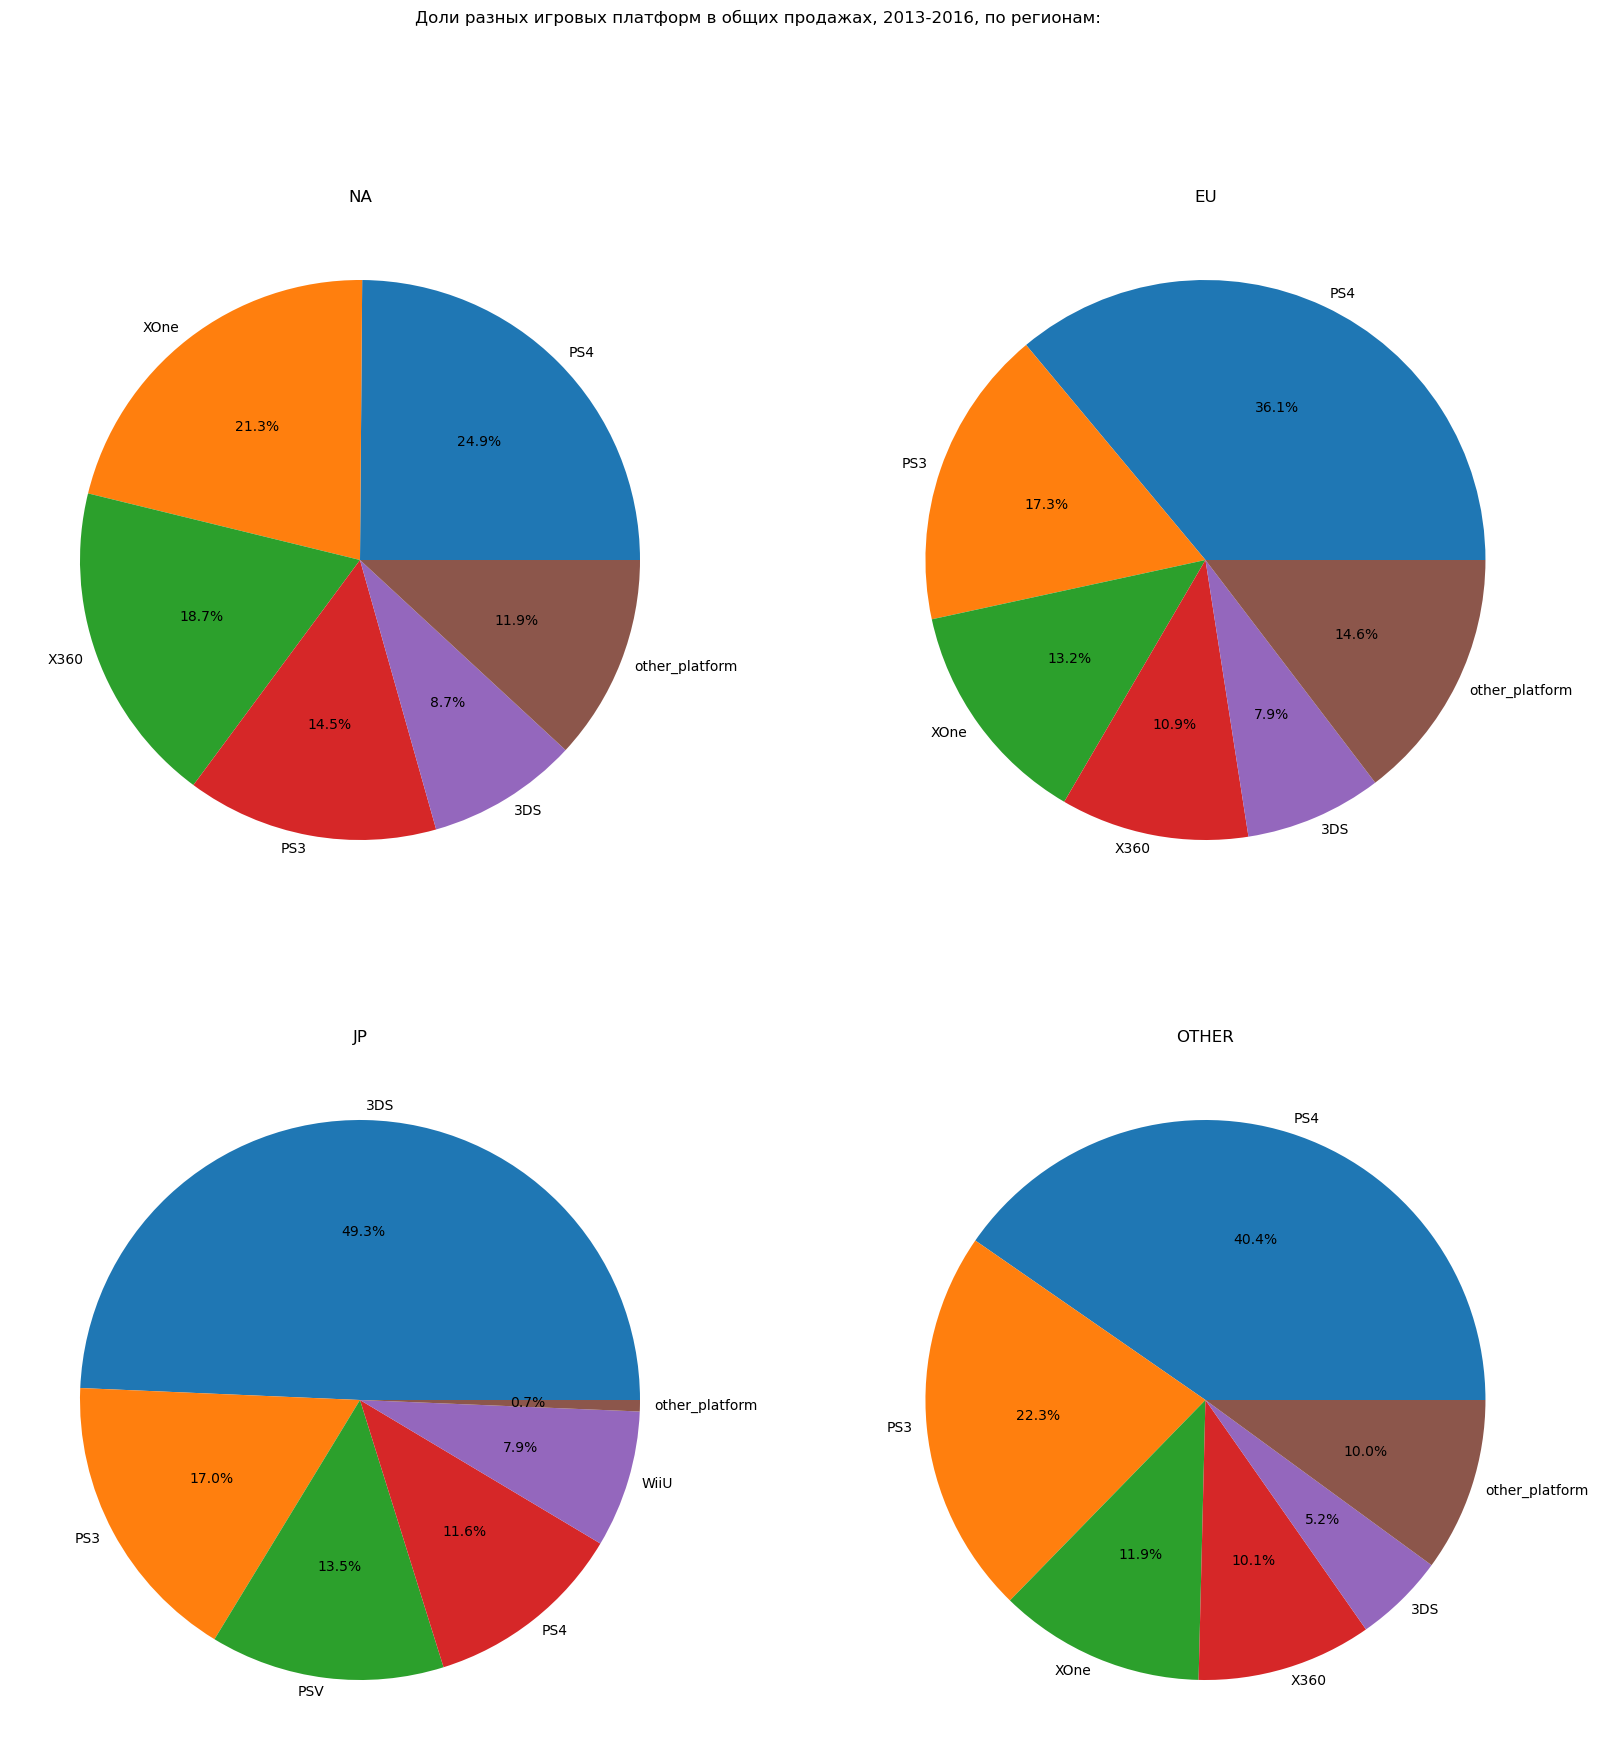

In [73]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))  #  формируем условие для вывода всех графиков на одной строке
fig. suptitle('Доли разных игровых платформ в общих продажах, 2013-2016, по регионам:')
#  задаём два массива (для вывода графиков по 2 в ряд) и счётчик для корректного получения данных из этих массивов
r=[0,0,1,1]
c=[0,1,0,1]
n = -1
sales_by_region = all_actual_platform.columns  # введём временную переменную - продажи по регионам
for col in sales_by_region: # запустим цикл расчёта: для каждого региона
    n += 1
    #  сортируем продажи по убыванию (определяем ТОП-5 платформ)
    all_actual_platform = all_actual_platform.sort_values(by = col, ascending=False) 
    # создаём дополнительный столбец с названиями платформ (для группировки в дальнейшем)
    all_actual_platform['platform_for_pie'] = all_actual_platform.index
    # для всех платформ после ТОП-5 заполняем доп. столбец одинаковой категорией - названием "other_platform"
    all_actual_platform.loc[5:, 'platform_for_pie'] = 'other_platform'
    #  создаём доп. столбец с продажами по каждой из категорий платформ
    all_actual_platform['sales_total'] = all_actual_platform.groupby('platform_for_pie')[col].transform('sum')
    #  создаём датафрейм для графика (первые 6 строк из ранее сформированной таблицы: ТОП-5 + other)
    data_for_plot = all_actual_platform[['platform_for_pie', 'sales_total']].head(6)
    #  выводим круговую диаграмму с долями каждой из платформ для данного региона
    ax[r[n],c[n]] = data_for_plot.plot(kind='pie', y='sales_total', ylabel='', autopct='%1.1f%%', ax=ax[r[n],c[n]],
                                       title=col.split("_")[0].upper(), legend=None, labels=all_actual_platform['platform_for_pie'], 
                                       labeldistance=1.05);

**Выводы:**
- заметен раздел крупнейших (с т.з. продаж) мировых рынков игр (Северная Америка и Европа) между платформами SONY и Microsoft, платформы этих производителей делят примерно пополам 80% американского рынка, на европейском рынке платформы SONY занимают более половины, Microsoft - почти четверть
- для японского рынка характерна приверженность "отечественным" платформам, все первые 5 мест занимают платформы SONY или Nintendo
- Nintendo у себя на родине показывает результаты продаж, превышающие SONY, такая картина не наблюдается больше нигде в мире
- также в ТОП-5 на рынке Японии вошли игры для платформы PSV (портативная консоль SONY), чего нет больше ни на одном из исследуемых рынков рынков
- в целом стоит отметить общее первенство решений SONY на мировых рынках игр

#### Популярность жанров по регионам в актуальном периоде (2013-2016)*

In [74]:
#  сформируем массив из актуальных жанров, затем удалим в нём "лишние" столбцы
all_actual_genre = actual_data.groupby('genre').sum()
all_actual_genre.drop(['year_of_release','critic_score','user_score','all_sales'], axis=1, inplace=True)
all_actual_genre

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,125.83,117.87,39.65,37.16
Adventure,7.14,8.22,5.11,2.43
Fighting,15.55,8.55,7.63,3.56
Misc,27.46,20.00,9.03,6.08
Platform,17.93,15.15,4.79,4.07
Puzzle,0.83,1.00,1.18,0.16
Racing,12.96,20.19,2.30,4.44
Role-Playing,46.40,36.97,50.01,11.48
Shooter,109.74,87.86,6.61,28.77


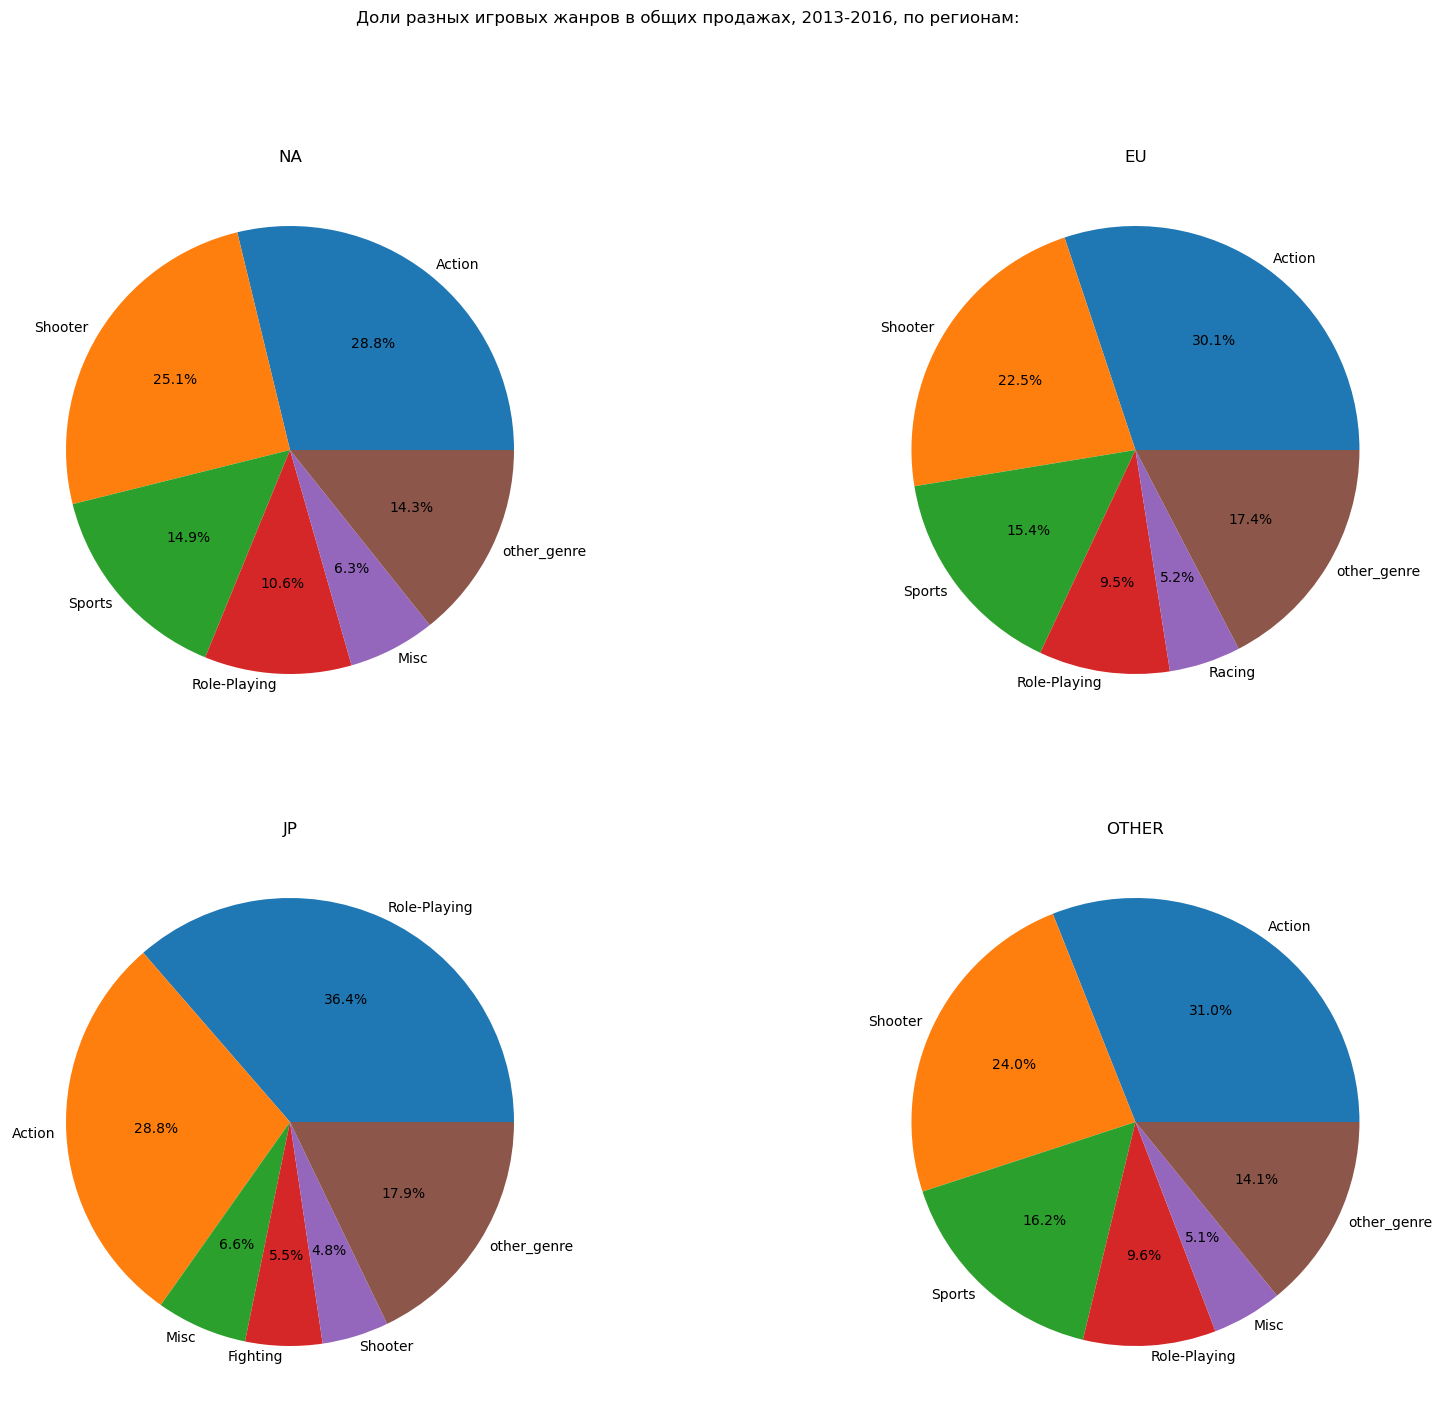

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))  #  формируем условие для вывода всех графиков на одной строке
fig. suptitle('Доли разных игровых жанров в общих продажах, 2013-2016, по регионам:')
#  задаём два массива (для вывода графиков по 2 в ряд) и счётчик для корректного получения данных из этих массивов
r=[0,0,1,1]
c=[0,1,0,1]
n = -1
sales_by_region = all_actual_genre.columns  # введём временную переменную - продажи по регионам
for col in sales_by_region: # запустим цикл расчёта: для каждого региона
    n+=1
    #  сортируем продажи по убыванию (определяем ТОП-5 платформ)
    all_actual_genre = all_actual_genre.sort_values(by = col, ascending=False) 
    # создаём дополнительный столбец с названиями платформ (для группировки в дальнейшем)
    all_actual_genre['genre_for_pie'] = all_actual_genre.index
    # для всех платформ после ТОП-5 заполняем доп. столбец одинаковой категорией - названием "other_genre"
    all_actual_genre.loc[5:, 'genre_for_pie'] = 'other_genre'
    #  создаём доп. столбец с продажами по каждой из категорий платформ
    all_actual_genre['sales_total'] = all_actual_genre.groupby('genre_for_pie')[col].transform('sum')
    #  создаём датафрейм для графика (первые 6 строк из ранее сформированной таблицы: ТОП-5 + other)
    data_for_plot = all_actual_genre[['genre_for_pie', 'sales_total']].head(6)
    #  выводим круговую диаграмму с долями каждой из платформ для данного региона
    ax[r[n],c[n]] = data_for_plot.plot(kind='pie', y='sales_total', ylabel='', autopct='%1.1f%%', ax=ax[r[n],c[n]], 
                                       title=col.split("_")[0].upper(), legend=None, 
                                       labels=all_actual_genre['genre_for_pie'], labeldistance=1.05);

**Выводы:**
- японский рынок отличается своеобразием - первое место у `role-playing`, при этом жанр `sports` отсутствует в топе  (возможно, это связано с основным ассортиментом игр лидирующей на рынке Nintendo)
- остальной мир с выбором жанров похож - `action`, `shooter`, `sports`, `role-playing` уверенно  занимают первые 4 места в продажах
- на долю жанров, не вошедших в ТОП остаётся примерно одинаковая доля в 14-18%, что является заметным объёмом, и указывает на необходимость поддерживать в ассортименте игры в том числе "нетоповых" жанров для всег рынков продаж
- японский рынок, при всём своеобразии, имеет ограничения, связанные со сравнительно небольшой ёмкостью, поэтому при выборе продвижения жанров (в мировом масштабе) необходимо учитывать ёмкость этого рынка

### Влияние возрастного рейтинга на продажи по регионам

In [76]:
all_actual_rating = actual_data.groupby('rating').sum()
all_actual_rating.drop(['year_of_release','critic_score','user_score','all_sales'], axis=1, inplace=True)
all_actual_rating.reset_index(inplace=True)

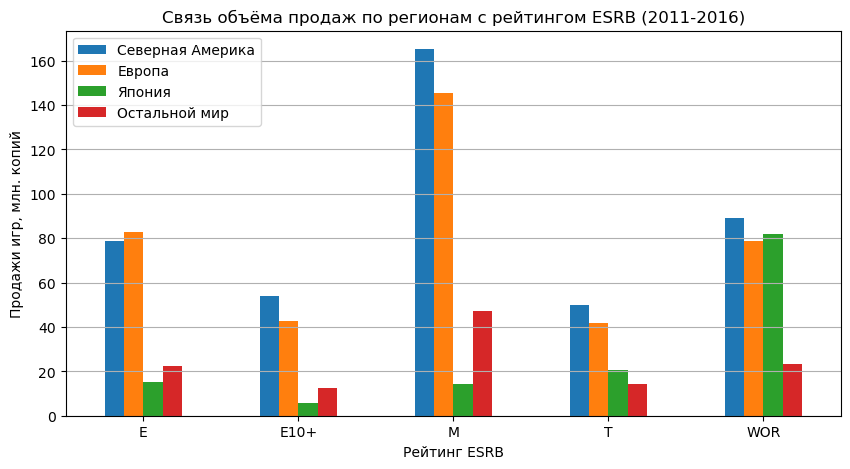

In [77]:
all_actual_rating.plot(kind = 'bar', x='rating', rot=0, figsize=(10,5),
                     xlabel='Рейтинг ESRB', ylabel='Продажи игр, млн. копий',
                     title='Связь объёма продаж по регионам с рейтингом ESRB (2011-2016)')
plt.grid(b=True, axis='y')
plt.legend(['Северная Америка', 'Европа', 'Япония', 'Остальной мир'], loc='upper left');

**Выводы:**
- основные объемы продаж (кроме Японии, выделяющейся и в этом вопросе) - у игр с рейтингом "для взрослых" (17+) - M
- это вполне объясняется рейтингами популярнейших (во всём мире, кроме Японии) жанров - `action`, `shooter`, как правило содержащими сцены насилия, "уводящими"  рейтинги в старшую возрастную категорию
- лидерство в Японии продаж игр с рейтингом E ("игры для всех") можно попробовать объяснить игровой политикой лидера (по объёмам продаж) Nintendo, выпускающего приставки и игры "для всей семьи"
- высока доля игр без рейтинга (WOR), для Японии это "лидер" в продажах, для остальных регионов эти игры находятся на 3-4 месте (из 5) по объёмам
- при изучении вопроса влияния рейтинга на продажи на японском рынке, необходимо произвести дополнительные поиск (и внесение в датафрейм) информации по рейтингу игр

Судя по имеющимся данным, в отличии от киностудий (для массового кинопроката), у создателей игр нет необходимости добиваться "детско-подросткового" рейтинга (E, E10+) для расширения аудитории, игры "для взрослых" везде (кроме Японии) удерживают основную долю рынка

## Статистический анализ: проверка гипотез о пользовательских рейтингах

*В рамках статистического анализа, проверим два утверждения, связанные с пользовательскими рейтингами платформ и игровых жанров*

Проверку будем осуществлять на актуальном массиве данных (2013-2016) \

**Утверждение 1:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые \

Сформулируем нулевую гипотезу, исходя из равенства рейтингов из утверждения: \
**H0: средний пользовательский рейтинг игр для XBox One равен среднему пользовательскому рейтингу игр для PC \
тогда \
H1: средний пользовательский рейтинг игр для XBox One *не* равен среднему пользовательскому рейтингу игр для PC**

Сравниваемые выборки не зависят друг от друга, поэтому к ним можно применить t-критерий проверки (Стьюдента) \
*(предварительно проверив на выбросы, к которому данный критерий чувствителен)*

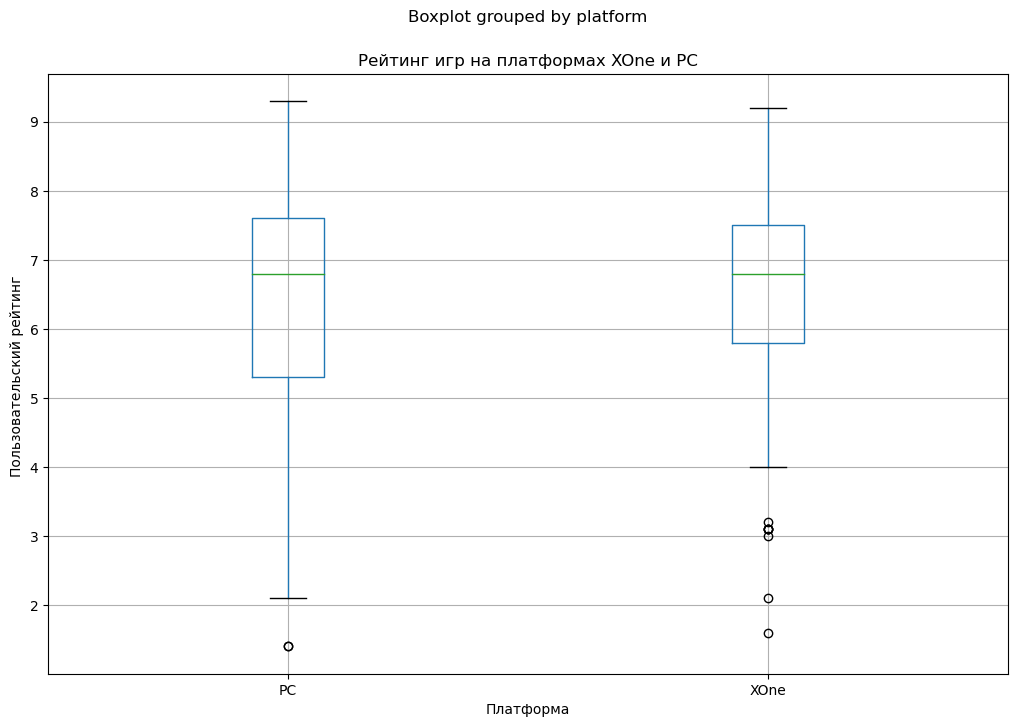

In [78]:
actual_data.query('platform == "XOne" or platform == "PC"').boxplot(column='user_score', by='platform', figsize=(12,8)). \
 set(xlabel='Платформа', ylabel='Пользовательский рейтинг ', title="Рейтинг игр на платформах XOne и PC");

**Выводы:**
Для обеих выборок распределения достаточно равномерны, число выбросов единично

*Создадим выборки данных пользовательского рейтинга для каждой из платформ, очистим их от пропусков*

In [79]:
test_XOne = actual_data.query('platform == "XOne" and user_score.notna()')['user_score']
test_PC = actual_data.query('platform == "PC" and user_score.notna()')['user_score']

In [80]:
test_XOne.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [81]:
test_PC.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

**Выводы:** выборки данных пользовательского рейтинга для обеих платформ валидны для стат.анализа критерием Стьюдента (более сотни значений, малое число выбросов) 

*Проверим нулевую гипотезу*

In [82]:
alpha = 0.05
results = st.ttest_ind(test_XOne,test_PC, equal_var=(stat.variance(test_XOne) == stat.variance(test_PC)))

print('p-value = ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value =  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Результаты t-test показывают, что средние для выборок расходятся статистически незначимо, **мы не можем отвергнуть H0** \
Таким образом, Утверждение 1 *не опровергается результатом стат.проверки*

**Утверждение 2:** Средние пользовательские рейтинги жанров `Action` и `Sports` разные 

Сформулируем нулевую гипотезу, предположив равенство рейтингов из утверждения 2: \
**H0: средний пользовательский рейтинг игр жанра Action равен среднему пользовательскому рейтингу игр жанра Sports** \
тогда \
**H1: средний пользовательский рейтинг игр жанра Action *не* равен среднему пользовательскому рейтингу игр жанра Sports**

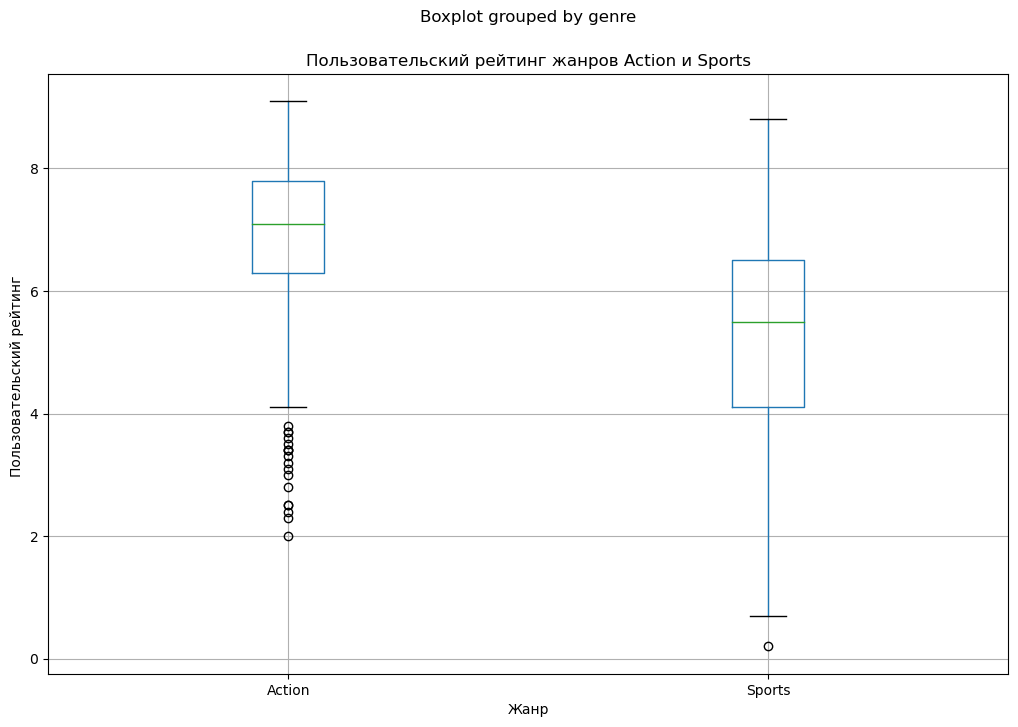

In [83]:
actual_data.query('genre == "Action" or genre == "Sports"').boxplot(column='user_score', by='genre', figsize=(12,8)). \
 set(xlabel='Жанр', ylabel='Пользовательский рейтинг ', title="Пользовательский рейтинг жанров Action и Sports");

*Создадим выборки данных пользовательского рейтинга для каждого из жанров, очистим их от пропусков*

In [84]:
test_action = actual_data.query('genre == "Action" and user_score.notna()')['user_score']
test_sports = actual_data.query('genre == "Sports" and user_score.notna()')['user_score']

In [85]:
test_action.describe()

count    388.000000
mean       6.842784
std        1.327847
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [86]:
test_sports.describe()

count    159.000000
mean       5.249686
std        1.783038
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

**Вывод:** выборки данных пользовательского рейтинга для обеих жанров валидны для стат.анализа критерием Стьюдента (более сотни  значений в каждой, малое количество выбросов) 

*Проверим нулевую гипотезу*

In [87]:
alpha = 0.05
results = st.ttest_ind(test_action,test_sports, equal_var=(stat.variance(test_action) == stat.variance(test_sports)))

print('p-value = ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value =  2.419141451747253e-20
Отвергаем нулевую гипотезу


Результаты t-test показывают, что средние для выборок расходятся статистически значимо, **мы опровергаем выбранную H0 в пользу H1: \
средний пользовательский рейтинг игр жанра Action не равен среднему пользовательскому рейтингу игр жанра Sports с уровнем значимости в 5%** \
Таким образом, Утверждение 2 *не опровергается результатом стат.проверки*

**Вывод:** 
- проверили утверждения путём оформления нулевых гипотез (предполагая равенство рейтингов между собой)
- выборки независимы, применили критерий Стьюдетна (t-test) для проверки двусторонних гипотез, предварительно очистив выборки от пропусков
- по итогу оба утверждения не были опровергнуты результатами проверки

## Общий вывод

1. *В рамках проекта* обработали датафрейм (> 16700 строк), содержащий информацию о продажах компьютерных игр (продажи в млн. копий) различных жанров для разных игровых платформ, регионов, с годами выпуска (период 1980-2016), оценками (отдельно, критиков и пользователей), а также возрастным рейтингом ассоциации ESRB.
 
 
2. *В ходе предварительной обработки:*
 - выявлены пропуски в столбцах `name` (название игры) и `year_of_release` (год выпуска), суммарный объём - менее 2% данных, восстановить эти данные возможности нет, было принято решение удалить строки, содержащие вышеописанные пропуски
 - выявлены пропуски в столбцах с оценками критиков и пользователей (а также значение 'tbd', которое, из-за невозможности достоверно определить оценку, соответствует пропуску), в связи с большим объёмом пропусков в этих столбцах (от трети до половины), было принято решение пропуски сохранить, учитывая этот факт при дальнейшем анализе
 - число категорий в столбце 'rating' на основе данных с сайта ESRB было принято свести к 4 основным (а пропуски заполнить категориальным значением "WOR" - without rating)
 - типы данных были приведены в соответствии с содержимым столбцов
 - после предобработки явных дубликатов не было обнаружено
 - созданы доп. столбцы, для удобства анализа: `all_sales` (суммарный объём продаж) и `manufacturer` (производитель игровой платформы)
 

3. *В ходе общего анализа продаж:*
 - обнаружено, что выпуск игр (в штуках) и их продажа (в млн. копий) вплоть до середины 90-х годов были крайне незначительны, по сравнению с последующим периодом, в этой связи при дальнейшем анализе **использовали датафрейм, отфильтрованный с 1994 по 2016 год**
 - отмечено, что в исследуемом периоде по объемам выпуска и продаж явно **выделяются топ-6 игровых платформ** (принадлежащих 3 производителям (**SONY, Nintendo, Microsoft**), чья суммарная доля составляла более 95% рынка)
 - для топ-6 платформ построены графики объёма продаж по годам, в результате определён **"жизненный цикл" топ-платформы, составляющий 11 лет, из которых 2-3 года приходится на рост, 4-6 - на активное развитие и 2-3 на спад**
 - проверка "жизненного цикла" **для всх платформ, включая не входящие в топ**, показала, что для них средний "жизненный цикл" составляет **не более 7 лет**, что может быть объяснено меньшими возможностями производителя в маркетинге как платформ, так и игр для них, а также отсутствием топовых игр, на доходы от которых можно поддерживать игровую экосистему платформы дольше
 - так как среди задач анализа была выдача прогноза на 2017 год, то, с учётом ранее полученных данных, установили **актуальный период для исследования 2013-2016**, платформы для расчёта брали только находящиеся (в 2016) в фазах роста или активной
 - выбранные параметры и изучение характера продаж в актуальном периоде привели к следующим рекомендациям:
      - сосредоточиться на продвижении игр для платформ **PS4 (Sony), XOne(Microsoft), 3DS(Nintendo)**
      - стараться (если производители такую возможность предоставят) сосредотачивать **маркетинговые усилия на продвижении единичных для этих платформ "топ-игр"** (учитывая что и сами производители вкладываются в их продвижение)  и **пары десятков "игр-середнячков"**, не распыляя усилия на сотни малопродающихся игр
      - жанры `Simulation`, `Strategy`, `Puzzle` и `Adventure`не стоят маркетинговых усилий, остальные - в силу устойчивых и/или крупных продаж - интересны для продвижения. **К топ-3 жанров относим `Shooter`, `Sports`, `Action`**
      - **обращать внимание при выборе игр "на продвижение" на те, которые получают высокую оценку критиков**, объём их продаж  сильнее коррелирует с такой оценкой, чем с оценкой пользователей (здесь корреляция практически не обнаружено)
  

4. *В ходе анализа предпочтений пользователя по регионам:*
- платформы производителей занимали в 2011-2016 первое место в продажах на "родном" для себя рынке (Nintendo - в Японии, Microsoft - на североамериканском), в то время как игры для платформ SONY первенствовали суммарно по миру (в том числе и благодаря синхронно представленным на рынке сразу нескольких платформ: PS3, PS4, PSV
- продажи игр в Японии максмально - на платформах японских производителей
- игры для PC в значимых объемах нигде, кроме европейского рынка, не продаются
- в число мировых топ-жанров по объёмам продаж входят `action`, `shooter`, `sports`, `role-playing`, при этом только в Японии последний из указанных занимает первое место, остальной мир предпочитает первые три
- рейтинг ESRB влияет на продажи следующим образом: первенство по объемам продаж (во всём мире, кроме Японии) у игр (17+), второе место - у игр "для всех". Учитываем, что рейтинг ESBR оформляется только для игр, выпускаемых на рынке NA.

**Итого:**
 - платформы, жанры, рейтинг (во всём мире, кроме Японии) - PS4, XOne, жанры `action`, `shooter`, рейтинг ESRB - M или E
 - платформы, жанры (в Японии) - PS4, 3DS, жанры `action`, `role-playing`, рейтинг - ESRB для японского рынка не актуален,  изучить местный рейтинг CERO и продвигать игры на его основе

5. *Проверка гипотез (статистический анализ данных):* \
 Были выдвинуты два утверждения сравнения пользовательского рейтинга для различных платформ и жанров:
 
  а) "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" \
  б) "Средние пользовательские рейтинги жанров Action и Sports разные"
 - в ходе анализа были выдвинуты поочерёдно нулевые гипотезы, постулирующие равенство рейтингов, уровень статистической значимости был выбран = 5%
 - первая из нулевых гипотез не была отвергнута, вторая нулевая гипотеза - была отвергнута
 - таким образом оба утверждения а) и б), не отвергнуты по результатм статистической проверки